In [6]:
#%load_ext cudf.pandas
#import pandas as pd


import cudf as pd
import shap

from itertools import product
from itertools import combinations
import plotly.graph_objects as go

import os

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset, ConcatDataset

import random
import ast
        
import sys

    
import torch.nn.functional as F
#from torcheval.metrics.functional import multiclass_confusion_matrix
from torch.optim import Adam ,SGD ,Adadelta
from torch.nn import CrossEntropyLoss

from torchvision.utils import save_image
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision import transforms

import optuna

from itertools import product
from itertools import combinations
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation ,FFMpegWriter ,PillowWriter

import dill
import numpy as np

import json
import pandas as pd
from tqdm import tqdm
import copy
import os 
import random

from collections import OrderedDict
import wandb


import random
import csv 
import time
import sys
import time
import datetime
import warnings
import traceback
import gc
from accelerate import Accelerator
import numpy as np

from pathlib import Path

from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


from gtda.mapper.filter import Projection,Entropy,Eccentricity
from gtda.mapper.cover import CubicalCover
# scikit-learn method
# giotto-tda method
from gtda.mapper.cluster import FirstSimpleGap
import warnings
warnings.filterwarnings('ignore')
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module='threadpoolctl')
import sys
import os
import textwrap
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
# Redirect stderr to null to suppress the exception messages
sys.stderr = open(os.devnull, 'w')
import ctypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress low-level warnings from C code
libc = ctypes.CDLL(None)
libc.prctl(15, 0, 0, 0, 0)

-1

In [7]:
#!pip install wandb

#print(cudf.__file__)
#print(cudf.__version__)

In [8]:
import wandb
wandb.login(key="ab631efc36e2c87f5f54d82b5cdbd6c501d5221f")

True

In [9]:
import accelerate

In [10]:
#!accelerate config

In [11]:
seed=74
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)


In [12]:
from Double_input_transformer import CustomDataset,TransformerAE

# Trainloader code

In [14]:
nb_scen=len(os.listdir("./data/Scenario/"))
for t in range(nb_scen):
    if(len(os.listdir("./data/Scenario/"+os.listdir("./data/Scenario/")[t])))==3:
        train_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/train pair.npy", allow_pickle=True)
        print("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/"+"train pair.npy" ,len(train_pair2))
        val_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/val pair.npy", allow_pickle=True)
        test_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/test pair.npy", allow_pickle=True)

        train_pair2 = [ list(x) for x in train_pair2]
        test_pair2 = [ list(x) for x in test_pair2]
        val_pair2 = [ list(x) for x in val_pair2]
        random.shuffle(train_pair2)
        random.shuffle(test_pair2)
        random.shuffle(val_pair2)
        break

./data/Scenario/overlapping 1 [0, 1, 2, 3, 4, 5, 6, 7] 31 leakyrelu/train pair.npy 10878


In [15]:

# Load the list
# train_pair2 = np.load('train_pair++.npy', allow_pickle=True)
# test_pair2 = np.load('test_pair++.npy', allow_pickle=True)
# val_pair2 = np.load('val_pair++.npy', allow_pickle=True)


train_pair2 = [ list(x) for x in train_pair2]
test_pair2 = [ list(x) for x in test_pair2]
val_pair2 = [ list(x) for x in val_pair2]
random.shuffle(train_pair2)
random.shuffle(test_pair2)
random.shuffle(val_pair2)

In [16]:
test_pair2[0]

[[0, 4, 5, 7], [2, 5], 4, 3]

In [17]:
def batchify(lst, batch_size):
    return [lst[i:i+batch_size] for i in range(0, len(lst), batch_size)]
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)
# Example usage:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
batch_size = 4
batches = batchify(my_list, batch_size)
print(batches)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10]]


In [18]:
len(train_pair2),len(test_pair2),len(val_pair2)

(10878, 44968, 3220)

In [19]:
All = list(train_pair2)+list(test_pair2)+list(val_pair2)
All = [ list(x) for x in All]
All.sort(reverse=True)
len(All)

59066

In [20]:

# train_pair2=[]
# test_pair2=[]
# val_pair2=[]
# for i,L1 in tqdm(enumerate(All)) :
#     matches=[]
#     for L2 in All :
#         if L2[2]==4 and L2[3]==0 and L1[2]==4 and L1[3]==0 and L1[0]==L2[0] and L2 not in matches and L2 not in train_pair2 and L2 not in test_pair2  and L2 not in val_pair2 :
#             matches.append(L2)
#     train_pair2.extend(matches[:int(len(matches)*0.7)])
#     test_pair2.extend(matches[int(len(matches)*0.7):int(len(matches)*0.85)])
#     val_pair2.extend(matches[int(len(matches)*0.85):])
#     if L1[0]==[0,1,2,3,4,5,6,7] :
#         print(len(matches))
# print(len(train_pair2))
# print(len(test_pair2))
# print(len(val_pair2))

In [21]:

# cs_tr=CustomDataset(train_pair2,batch_size=200)
# end_time = time.time() 
# execution_time = end_time - start_time

# Dataset,EXP,ACC,U = cs_tr[0]
# x1,x2,tg = Dataset[:,0,:], Dataset[:,1,:],Dataset[:,2,:]

In [22]:
#len(cs_tr.batchs)

In [23]:
#x1.shape,x2.shape,tg.shape

In [24]:
#
random.shuffle(train_pair2)
train_pair2[:2]

[[[2, 5, 7], [4, 5], 4, 3], [[1, 7], [1, 2, 4, 6], 4, 3]]

In [25]:
# All = list(train_pair)+list(test_pair)+list(val_pair)
# All = [ list(x) for x in All]
# train_pair=[]
# test_pair=[]
# val_pair=[]
# for L1 in tqdm(All) :
#     matches=[]
#     for L2 in All :
#         if L1[0]==L2[0] and L2 not in matches and L2[2]==4 and L2[3]==0 :
#             matches.append(L2)
#     train_pair.extend(matches[:int(len(matches)*0.7)])
#     test_pair.extend(matches[int(len(matches)*0.7):int(len(matches)*0.85)])
#     val_pair.extend(matches[int(len(matches)*0.85):])

    

In [26]:
# val_pair=test_pair[int(len(test_pair)/2):]
# test_pair=test_pair[:int(len(test_pair)/2)]


In [28]:
val_pair2[0] ,len(train_pair2)

([[6, 7], [2, 5], 4, 3], 10878)

In [29]:
# np.save("train_pair++", train_pair2)
# np.save("test_pair++", test_pair2)
# np.save("val_pair++", val_pair2)

# Autoencoder

In [32]:
#!pip install einops

In [36]:
class EmbedderNeuronGroup(nn.Module):
    def __init__(self, d_model, seed=22):
        super().__init__()
        #print("EmbedderNeuroneGroup")
        self.neuron_l1 = nn.Linear(200, d_model) #8
        self.neuron_l2 = nn.Linear(72, d_model) #12

    def forward(self, x):
        return self.multiLinear(x)

    def multiLinear(self, v):
        #print("multi-linear method",v.shape)

        l = []

        for ndx in range(8):
            idx_start = ndx * 200
            idx_end = idx_start + 200
            l.append(self.neuron_l1(v[:,idx_start:idx_end]))

        # l2
        for ndx in range(12):
            idx_start = 200*8 + ndx * 72
            idx_end = idx_start + 72
            l.append(self.neuron_l2(v[:,idx_start:idx_end]))
        #print(len(l))
        #print(len(l[0]))
        final = torch.stack(l, dim=1)

        # print(final.shape)
        return final



In [40]:
# max_seq_len=176,
# N=4
# heads=3
# d_model=900
# d_ff=900
# neck=700
# dropout=0.1
# # Enc=EncoderNeuronGroup(d_model=d_model, N=N, heads=heads, max_seq_len=max_seq_len, dropout=dropout,d_ff=d_ff)
# # vec1 = torch.rand(1,2464)
# # res,scores=Enc(vec1)
# # res.shape

In [47]:
# vec2neck = nn.Linear(d_ff*2, neck)
# print(res.shape)
# out3=torch.cat([res,res], dim=2)
# print("neck input:",out3.shape)
# sum_r=torch.sum(out3, dim=1, keepdim=False)
# vec2=vec2neck(sum_r)
# print(len(vec2))
# tanh = nn.Tanh()
# neck_t=tanh(vec2)
# print("neck shape:",neck_t.shape)

In [60]:
# Dec=DecoderNeuronGroup(d_model=d_model, N=N, heads=heads, max_seq_len=max_seq_len, dropout=dropout,d_ff=d_ff,neck=neck)
# res,scores=Dec(neck_t)
# res.shape

In [65]:
len(test_pair2),len(train_pair2),len(val_pair2)#,len(test_tgt),len(train_tgt),len(val_tgt)

(44968, 10878, 3220)

In [66]:
#test_pair=[ x for x in test_pair  if (0 in x[0]) and (1 in x[0]) and (2 in x[0] or 2 in x[1] ) and (3 in[0] or 2 in x[1]) and (4 in[0] or 2 in x[1] ) ]
#len(test_pair)

In [69]:
from torchvision import datasets
IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')

class ClassSpecificImageFolder(datasets.DatasetFolder):
    def __init__(
            self,
            root,
            dropped_classes=[],
            transform = None,
            target_transform = None,
            loader = datasets.folder.default_loader,
            is_valid_file = None,
    ):
        self.dropped_classes = dropped_classes
        super(ClassSpecificImageFolder, self).__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
                                                       transform=transform,
                                                       target_transform=target_transform,
                                                       is_valid_file=is_valid_file)
        self.imgs = self.samples

    def find_classes(self, directory):
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
        classes = [c for c in classes if c not in self.dropped_classes]
        if not classes:
            raise FileNotFoundError(f"Couldn't find any class folder in {directory}.")

        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

In [70]:


# print(mod.numParams())
# x1 = torch.rand(1,2464)
# x2 = torch.rand(1,2464)
# mod=mod.to(device).to(torch.float32)

# #x1=x1.to(torch.float32)
# #x2=x2.to(torch.float32)
# x1=x1.to(device)
# x2=x2.to(device)
# mod=mod.to(device)
# out = mod(x1,x2)
# print("Output Shape: ", out[0].shape)

# from torchinfo import summary

# summary(mod)


In [71]:


#from torcheval.metrics.functional import multiclass_confusion_matrix

class CNN(nn.Module):
    def __init__(
        self,
        channels_in,
        nlin="leakyrelu",
        dropout=0.0,
        init_type="uniform",
    ):
        super().__init__()
        # init module list
        self.module_list = nn.ModuleList()
        ### ASSUMES 28x28 image size
        ## compose layer 1
        self.module_list.append(nn.Conv2d(channels_in, 8, 5))
        self.module_list.append(nn.MaxPool2d(2, 2))
        self.module_list.append(self.get_nonlin(nlin))
        # apply dropout
        if dropout > 0:
            self.module_list.append(nn.Dropout(dropout))
        ## compose layer 2
        self.module_list.append(nn.Conv2d(8, 6, 5))
        self.module_list.append(nn.MaxPool2d(2, 2))
        self.module_list.append(self.get_nonlin(nlin))
        ## add dropout
        if dropout > 0:
            self.module_list.append(nn.Dropout(dropout))
        ## compose layer 3
        self.module_list.append(nn.Conv2d(6, 4, 2))
        self.module_list.append(self.get_nonlin(nlin))
        ## add flatten layer
        self.module_list.append(nn.Flatten())
        ## add linear layer 1
        self.module_list.append(nn.Linear(3 * 3 * 4, 20))
        self.module_list.append(self.get_nonlin(nlin))
        ## add dropout
        if dropout > 0:
            self.module_list.append(nn.Dropout(dropout))
        ## add linear layer 1
        self.module_list.append(nn.Linear(20, 10))

        ### initialize weights with se methods
        self.initialize_weights(init_type)

    def initialize_weights(self, init_type):
        # print("initialze model")
        for m in self.module_list:
            if type(m) == nn.Linear or type(m) == nn.Conv2d:
                if init_type == "xavier_uniform":
                    torch.nn.init.xavier_uniform_(m.weight)
                if init_type == "xavier_normal":
                    torch.nn.init.xavier_normal_(m.weight)
                if init_type == "uniform":
                    torch.nn.init.uniform_(m.weight)
                if init_type == "normal":
                    torch.nn.init.normal_(m.weight)
                if init_type == "kaiming_normal":
                    torch.nn.init.kaiming_normal_(m.weight)
                if init_type == "kaiming_uniform":
                    torch.nn.init.kaiming_uniform_(m.weight)
                # set bias to some small non-zero value
                m.bias.data.fill_(0.01)

    def get_nonlin(self, nlin):
        # apply nonlinearity
        if nlin == "leakyrelu":
            return nn.LeakyReLU()
        if nlin == "relu":
            return nn.ReLU()
        if nlin == "tanh":
            return nn.Tanh()
        if nlin == "sigmoid":
            return nn.Sigmoid()
        if nlin == "silu":
            return nn.SiLU()
        if nlin == "gelu":
            return nn.GELU()


    def forward(self, x):
        # forward prop through module_list
        for layer in self.module_list:
            x = layer(x)
        return x

    def forward_activations(self, x):
        # forward prop through module_list
        activations = []
        for layer in self.module_list:
            x = layer(x)
            if (
                isinstance(layer, nn.Tanh)
                or isinstance(layer, nn.Sigmoid)
                or isinstance(layer, nn.ReLU)
                or isinstance(layer, nn.LeakyReLU)
                or isinstance(layer, nn.SiLU)
                or isinstance(layer, nn.GELU)
                or isinstance(layer, ORU)
                or isinstance(layer, ERU)
            ):
                activations.append(x)
        return x, activations
def train(model, trainloader, optimizer, criterion,nb_classes,First=False,df=None,verbose=False,log_freq_steps=25):
    List_mx=[]
    model.train()
    #print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in enumerate(trainloader):
        counter += 1
        image, labels = data
        image = image
        labels = labels
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        #mx=multiclass_confusion_matrix(preds ,labels,nb_classes,normalize="pred")
        #List_mx.append(mx)
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
        if First==True and i%log_freq_steps==0 :
            epoch_loss = train_running_loss / counter
            epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
            if verbose==True:
                print(epoch_acc,"%")
            #print(f"step {i}:",epoch_loss, epoch_acc)
            if type(df)!='NoneType':
                df.at[track,f"Step {i}"]=epoch_acc
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc,List_mx



def compute_shap_values(model, images, baseline):
    explainer = shap.GradientExplainer(model, baseline)
    shap_values = explainer.shap_values(images)
    return shap_values

def validate(model, testloader, criterion, nb_classes):
    model.eval()
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    correct_counts = {str(i): 0 for i in range(nb_classes)}
    total_counts = {str(i): 0 for i in range(nb_classes)}
    shapley_values_per_class = {str(i): [] for i in range(nb_classes)}
    
    with torch.no_grad():
        for i, data in enumerate(testloader):
            if data is None:
                continue
            counter += 1
            image, labels = data
            outputs = model(image)
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
            
            # Update correct/total counts
            for j in range(len(labels)):
                class_label = str(labels[j].item())
                total_counts[class_label] += 1
                if preds[j] == labels[j]:
                    correct_counts[class_label] += 1
            
            # Compute Shapley values for a batch
            baseline = torch.zeros_like(image)  # Use black image as baseline
            shap_values = compute_shap_values(model, image, baseline)
            
            for j in range(len(labels)):
                class_label = str(labels[j].item())
                shapley_values_per_class[class_label].append(np.mean(shap_values[j].numpy()))
    
    # Compute final metrics
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    
    # Prepare data for wandb histograms
    correct_data = [[correct_counts[str(i)]] for i in range(nb_classes)]
    total_data = [[total_counts[str(i)]] for i in range(nb_classes)]
    
    correct_table = wandb.Table(data=correct_data, columns=["Correct Predictions"])
    total_table = wandb.Table(data=total_data, columns=["Total Instances"])
    
    wandb.log({
        "Prediction Histogram": wandb.plot.histogram(correct_table, "Correct Predictions", title="Correct Predictions Per Class"),
        "Total Histogram": wandb.plot.histogram(total_table, "Total Instances", title="Total Instances Per Class")
    })
    
    # Log Shapley value histograms
    for class_label, shap_vals in shapley_values_per_class.items():
        if shap_vals:
            shap_table = wandb.Table(data=[[val] for val in shap_vals], columns=["Shapley Values"])
            wandb.log({f"Shapley Values - Class {class_label}": wandb.plot.histogram(shap_table, "Shapley Values", title=f"Shapley Values for Class {class_label}")})
    
    return epoch_loss, epoch_acc
def create_frame(step,ax,data):
    ax=ax.cla()
    sns.heatmap(data[step][-1].cpu(),annot=True,cmap="cubehelix",ax=ax,cbar=False)
    plt.title('Epoch {} training {}'.format(step,exp)  )

In [72]:
#L_activations=["gelu","relu","silu","leakyrelu","sigmoid","tanh"]
#csv_files,L_activations

In [73]:
#(2) in https://arxiv.org/pdf/2209.14733.pdf
vec1 = torch.rand(1,2464)
vec2 = torch.rand(1,2464)


In [79]:
Cols=["label task 1","index","Accuracy task1",\
      "label task 2","Accuracy task2"]+ \
["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]+ \
["Loader Set","Reconstructed Accuracy ID","Actual Accuracy","Reconstructed Accuracy OOD","Transformer Loss","lr",'epochCNN','ActivationCNN'] 

print(len(Cols))
predicted_Weights= pd.DataFrame(columns=Cols)

# row=["".format(task1),int(ind[0]),ACC[0],"".format(task2),ACC[1]]+vector_aux.to_list()+["train",valid_epoch_acc0,ACC[2],valid_epoch_acc1,L_train[-1]]
# predicted_Weights.append(row, ignore_index=True)
predicted_Weights

2477


,label task 1,index,Accuracy task1,label task 2,Accuracy task2,weight 0,weight 1,weight 2,weight 3,weight 4,...,bias 2462,bias 2463,Loader Set,Reconstructed Accuracy ID,Actual Accuracy,Reconstructed Accuracy OOD,Transformer Loss,lr,epochCNN,ActivationCNN


# Training 

In [82]:
def optimizer_to(optim, device):
    for param in optim.state.values():
        # Not sure there are any global tensors in the state dict
        if isinstance(param, torch.Tensor):
            param.data = param.data.to(device)
            if param._grad is not None:
                param._grad.data = param._grad.data.to(device)
        elif isinstance(param, dict):
            for subparam in param.values():
                if isinstance(subparam, torch.Tensor):
                    subparam.data = subparam.data.to(device)
                    if subparam._grad is not None:
                        subparam._grad.data = subparam._grad.data.to(device)
def scheduler_to(sched, device):
    for param in sched.__dict__.values():
        if isinstance(param, torch.Tensor):
            param.data = param.data.to(device)
            if param._grad is not None:
                param._grad.data = param._grad.data.to(device)

In [83]:
import datetime
print(type(str(datetime.datetime.now())))

<class 'str'>


In [84]:
from torch.autograd import Variable
def loss_Contractive(W, x, recons_x, h, lam):
    dh = h * (1 - h) 

    w_sum = torch.sum(Variable(W)**2, dim=1)

    w_sum = w_sum.unsqueeze(1) # shape N_hidden x 1
 
    contractive_loss = torch.sum(torch.mm(dh**2, w_sum), 0)

    return contractive_loss.mul_(lam)

vec1 = torch.rand(1,2464)
vec2 = torch.rand(1,2464)
#print(out[1].shape,W.shape)
# for name, param in mod.named_parameters():
#     if name == 'vec2neck.weight':
#         W = param
#         break
# CL=loss_Contractive(W,vec1,vec2, out[1], 0.005)

# CL

In [85]:
vec1 = torch.rand(5,2464)
vec2 = torch.rand(5,2464)
from scipy.stats import wasserstein_distance
# Convert to numpy arrays
vec1_np = vec1.numpy()
vec2_np = vec2.numpy()

# Compute Wasserstein distance for each pair of vectors
wsd_list = [wasserstein_distance(vec1_np[i], vec2_np[i]) for i in range(vec1_np.shape[0])]

# If you need an aggregate measure, you can compute the average distance
average_wsd = sum(wsd_list) / len(wsd_list)


In [87]:
#!pip install cudf

In [88]:
#%load_ext cudf.pandas

In [89]:
def q_quantile_loss(pred, target, q):
    error = target - pred
    return torch.mean(torch.max(q * error, (q - 1) * error))

def frobenius_norm_jacobian(model, x1,x2):
    x1 = x1.clone().detach().requires_grad_(True)
    x2 = x2.clone().detach().requires_grad_(True)
    y = model(x1,x2)
    jacobian = []
    for i in range(y[0].shape[0]):
        grad_outputs = torch.zeros_like(y[0])
        grad_outputs[:, i] = 1
        grad = torch.autograd.grad(outputs=y[0], inputs=(x1,x2), grad_outputs=grad_outputs,
                                   retain_graph=True, create_graph=True)[0]
        jacobian.append(grad)
    jacobian = torch.stack(jacobian, dim=1)
    frobenius_norm = torch.norm(jacobian, p='fro')
    return frobenius_norm.detach().item()

# mod= TransformerAE(max_seq_len=50,
#                         N=4,
#                         heads=4,
#                         d_model=40,
#                         d_ff=40,
#                         neck=25,
#                         dropout=0.12
#                        )
# mod=mod.cuda()
# vec1 = torch.rand(5,2464)
# vec2 = torch.rand(5,2464)
# vec1=vec1.cuda()
# vec2=vec2.cuda()
# output=mod(vec1,vec2)
# print(output[0].shape)
# print(frobenius_norm_jacobian(mod, vec1,vec2))

# 0.15*frobenius_norm_jacobian(mod, vec1,vec2)+q_quantile_loss(output[0],vec1,0.9)

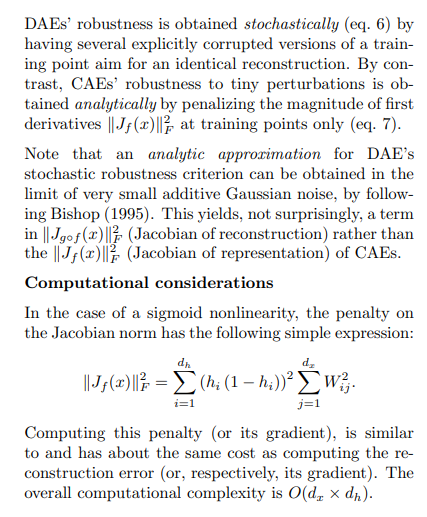

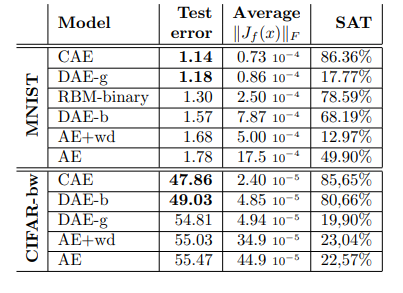

In [92]:
%%time
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import quad

def kernel_density_estimate(vector):
    kde = gaussian_kde(vector)
    return kde

def finite_difference_gradient(x, kde, h=1e-5):
    pdf_value_plus_h = kde.evaluate(x + h)
    pdf_value_minus_h = kde.evaluate(x - h)
    gradient = (np.log(pdf_value_plus_h) - np.log(pdf_value_minus_h)) / (2 * h)
    return gradient

def score_function(x, kde):
    return finite_difference_gradient(x, kde)

def fisher_information_integral(kde, xmin, xmax):
    def integrand(x):
        score = score_function(x, kde)
        return score**2
    
    fisher_info, _ = quad(integrand, xmin, xmax)
    return fisher_info

def fisher_information(vector):
    kde = kernel_density_estimate(vector)
    xmin, xmax = np.min(vector), np.max(vector)
    fisher_info = fisher_information_integral(kde, xmin, xmax)
    return fisher_info

def fisher_information_difference(vec1, vec2):
    fisher_info_1 = fisher_information(vec1)
    fisher_info_2 = fisher_information(vec2)
    
    fisher_info_diff = np.abs(fisher_info_1 - fisher_info_2)
    return fisher_info_diff

"""# Example vectors
    # vec1 = np.random.randn(1000)
    # vec2 = np.random.randn(1000)
    # fisher_info_diff = fisher_information_difference(vec1, vec2)
vec1 = torch.rand(80,2464)
vec2 = torch.rand(80,2464)

vec1_np = vec1.detach().cpu().numpy()
vec2_np = vec2.detach().cpu().numpy()
wsd_list = [fisher_information_difference(vec1_np[i,:], vec2_np[i,:])
            +np.log(abs(np.sum(np.abs(vec1_np[i,:])-np.sum(np.abs(vec2_np[i,:])))))
            for i in range(vec1_np.shape[0])]
average_FIM_N1_Loss= sum(wsd_list) / len(wsd_list)
average_FIM_N1_Loss
###loss_tr = criterion(output[0],tg)+average_wsd"""

CPU times: user 26 μs, sys: 0 ns, total: 26 μs
Wall time: 28.8 μs


'# Example vectors\n    # vec1 = np.random.randn(1000)\n    # vec2 = np.random.randn(1000)\n    # fisher_info_diff = fisher_information_difference(vec1, vec2)\nvec1 = torch.rand(80,2464)\nvec2 = torch.rand(80,2464)\n\nvec1_np = vec1.detach().cpu().numpy()\nvec2_np = vec2.detach().cpu().numpy()\nwsd_list = [fisher_information_difference(vec1_np[i,:], vec2_np[i,:])\n            +np.log(abs(np.sum(np.abs(vec1_np[i,:])-np.sum(np.abs(vec2_np[i,:])))))\n            for i in range(vec1_np.shape[0])]\naverage_FIM_N1_Loss= sum(wsd_list) / len(wsd_list)\naverage_FIM_N1_Loss\n###loss_tr = criterion(output[0],tg)+average_wsd'

In [93]:
!pip install pykeops
!pip install geomloss

In [97]:
vec1[0,:]

tensor([0.3014, 0.7426, 0.7543,  ..., 0.0899, 0.3142, 0.4017])

In [103]:
import torch
from geomloss import SamplesLoss
vec1 = torch.rand(1,2464)
vec2 = torch.rand(1,2464)
LossWS=SamplesLoss('sinkhorn')

from scipy.stats import wasserstein_distance
# Convert to numpy arrays
vec1_np = vec1[0].numpy()
vec2_np = vec2[0].numpy()
print(LossWS(vec1,vec2), wasserstein_distance(vec1_np,vec2_np))

tensor(210.8783) 0.01862557338816779


In [104]:
# Turn off optuna log notes.
optuna.logging.set_verbosity(optuna.logging.WARN)


def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "Trial {} finished with best value: {} and parameters: {}. ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [105]:
### Imports
from collections import deque
from typing import Dict, Optional, Literal
import torch
import torch.nn as nn


### Grokfast
def gradfilter_ema(
    m: nn.Module,
    grads: Optional[Dict[str, torch.Tensor]] = None,
    alpha: float = 0.99,
    lamb: float = 5.0,
) -> Dict[str, torch.Tensor]:
    if grads is None:
        grads = {n: p.grad.data.detach() for n, p in m.named_parameters() if p.requires_grad}

    for n, p in m.named_parameters():
        if p.requires_grad:
            grads[n] = grads[n] * alpha + p.grad.data.detach() * (1 - alpha)
            p.grad.data = p.grad.data + grads[n] * lamb

    return grads


### Grokfast-MA
def gradfilter_ma(
    m: nn.Module,
    grads: Optional[Dict[str, deque]] = None,
    window_size: int = 128,
    lamb: float = 5.0,
    filter_type: Literal['mean', 'sum'] = 'mean',
    warmup: bool = True,
    trigger: bool = False,
) -> Dict[str, deque]:
    if grads is None:
        grads = {n: deque(maxlen=window_size) for n, p in m.named_parameters() if p.requires_grad}

    for n, p in m.named_parameters():
        if p.requires_grad:
            grads[n].append(p.grad.data.detach())

            if not warmup or len(grads[n]) == window_size and not trigger:
                if filter_type == "mean":
                    avg = sum(grads[n]) / len(grads[n])
                elif filter_type == "sum":
                    avg = sum(grads[n])
                else:
                    raise ValueError(f"Unrecognized filter_type {filter_type}")
                p.grad.data = p.grad.data + avg * lamb

    return grads

# Training loop

In [107]:
# mod = TransformerAE(max_seq_len=50,
#                         N=4,
#                         heads=4,
#                         d_model=100,
#                         d_ff=100,
#                         neck=50,
#                         dropout=0.8
#                        ).cuda()

In [108]:
# vec1 = torch.rand(200, 2464).cuda()
# vec2 = torch.rand(200, 2464).cuda()
# target= torch.rand(200, 2464).cuda()

# output=mod(vec1,vec2)
# output[0].shape,target.shape

In [109]:
#z1_pred[0].shape,z1_vec1[

In [114]:
#DF=df

In [115]:
# PD=DF[Cols[2466:4930]]
# dataPD=PD.to_numpy()
# GT=DF[Cols[2:2466]]
# dataGT=GT.to_numpy()
# FN=DF[Cols[4930:7394]]
# dataF=FN.to_numpy()
# # PD.head(20)

In [116]:
# GT=DF[Cols[2:2466]]
# dataGT=GT.to_numpy()
# GT.head(2)

In [121]:
import torch
import numpy as np
import torch
import torch.nn as nn
from torch.autograd.functional import vjp
import networkx as nx
# Now you can use fisher_distance as a differentiable loss component


In [124]:
class QuantileLoss(torch.nn.Module):
    def __init__(self, q):
        super(QuantileLoss, self).__init__()
        self.q = q

    def forward(self, y_pred, y_true):
        # Compute the quantile loss for each prediction
        error = y_true - y_pred
        loss = torch.maximum(self.q * error, (self.q - 1) * error)
        return loss.mean()
quantile = 0.5
q_quantile_loss = QuantileLoss(q=quantile)

In [127]:
import torch
import torch.nn as nn

class NormDifferenceDistance(nn.Module):
    def __init__(self):
        super(NormDifferenceDistance, self).__init__()

    def forward(self, y_pred, y_true):
        # Calculate L2 norms for each tensor
        norm_pred = torch.norm(y_pred, p=2)
        norm_true = torch.norm(y_true, p=2)
        
        # Compute the absolute difference of norms as the distance
        distance = torch.abs(norm_pred - norm_true)
        return distance

class StandardizedNormDifferenceDistance(nn.Module):
    def __init__(self):
        super(StandardizedNormDifferenceDistance, self).__init__()

    def forward(self, y_pred, y_true):
        # Normalize each tensor by its L2 norm
        norm_pred = torch.norm(y_pred, p=2)
        norm_true = torch.norm(y_true, p=2)
        y_pred_normalized = y_pred / (norm_pred + 1e-8)
        y_true_normalized = y_true / (norm_true + 1e-8)
        
        # Calculate L2 distance between normalized tensors
        distance = torch.norm(y_pred_normalized - y_true_normalized, p=2)
        return distance


In [129]:
class AutoregressiveMSELoss(nn.Module):
    def __init__(self, lambda_weights=None, epsilon=1e-6):
        """
        Autoregressive MSE Loss with weighted contributions.

        Args:
            lambda_weights (list or None): Weights for the autoregressive components.
                                           If None, equal weights are used.
            epsilon (float): A small constant added to denominators for numerical stability.
        """
        super(AutoregressiveMSELoss, self).__init__()
        self.lambda_weights = lambda_weights
        self.epsilon = epsilon

    def forward(self, predictions, targets, delimiters):
        """
        Compute the autoregressive MSE loss.

        Args:
            predictions (torch.Tensor): Predicted tensor of shape [batch_size, total_length].
            targets (torch.Tensor): Target tensor of shape [batch_size, total_length].
            delimiters (list of ints): End indices for chunks, defining tensor splits.

        Returns:
            torch.Tensor: The computed loss.
        """
        n_chunks = len(delimiters)
        mse_losses = []
        start = 0

        # Compute MSE loss for each chunk
        for end in delimiters:
            pred_chunk = predictions[:, start:end]
            target_chunk = targets[:, start:end]
            mse_loss = nn.functional.mse_loss(pred_chunk, target_chunk, reduction='mean')
            mse_losses.append(mse_loss)
            start = end

        # Set default weights if not provided
        if self.lambda_weights is None:
            self.lambda_weights = [1.0] * n_chunks

        if len(self.lambda_weights) != n_chunks:
            raise ValueError("lambda_weights must have the same length as the number of chunks.")

        # Compute the weighted autoregressive loss
        autoregressive_loss = mse_losses[0]  # Start with the first chunk
        for i in range(1, n_chunks):
            autoregressive_loss += (
                self.lambda_weights[i - 1] * (mse_losses[i] / (mse_losses[i - 1] + self.epsilon))
            )
        
        return autoregressive_loss


# Example Usage
# Suppose the sequence is split into chunks based on delimiters
predictions = torch.randn(10, 2464)  # [batch_size, total_length]
targets = torch.randn(10, 2464)     # [batch_size, total_length]
delimiters = [208, 1414, 1514, 2254, 2464]

# Initialize the loss function with custom weights
loss_fn = AutoregressiveMSELoss(lambda_weights=[1,0.5, 0.7, 0.9, 1.1])

# Compute the loss
loss = loss_fn(predictions, targets, delimiters)
print("Loss:", loss.item())

Loss: 5.017904758453369


In [133]:
import itertools

# Initial list of losses
Losses=["MAE","MAPE","MSE","Latent","sinkhorn","KL divergence","CAE","Q-quantile_loss","LWLN","LWWS","log-norm","Forb_norm","LWWS_scipy","AUTO"]

# Define prioritized losses
priority_losses = {"MAE","MAPE","MSE","Latent","LWWS_scipy","AUTO","sinkhorn","KL divergence","FIM","Q-quantile_loss", }

# Separate prioritized singletons and other singletons
prioritized_singletons = [loss for loss in Losses if loss in priority_losses]
other_singletons = [loss for loss in Losses if loss not in priority_losses]

# Generate pairs, separating prioritized pairs from non-prioritized ones
priority_pairs = [[a, b] for a, b in itertools.combinations(Losses, 2) if a in priority_losses or b in priority_losses]
non_priority_pairs = [[a, b] for a, b in itertools.combinations(Losses, 2) if a not in priority_losses and b not in priority_losses]

# Combine prioritized singletons, prioritized pairs, other singletons, and other pairs
all_losses = prioritized_singletons + priority_pairs + other_singletons + non_priority_pairs

# Print the result
#all_losses.insert(0,['MSE', 'ws_scipy','LWWS_scipy'])
print(all_losses)


['MAE', 'MAPE', 'MSE', 'Latent', 'sinkhorn', 'KL divergence', 'Q-quantile_loss', 'LWWS_scipy', 'AUTO', ['MAE', 'MAPE'], ['MAE', 'MSE'], ['MAE', 'Latent'], ['MAE', 'sinkhorn'], ['MAE', 'KL divergence'], ['MAE', 'CAE'], ['MAE', 'Q-quantile_loss'], ['MAE', 'LWLN'], ['MAE', 'LWWS'], ['MAE', 'log-norm'], ['MAE', 'Forb_norm'], ['MAE', 'LWWS_scipy'], ['MAE', 'AUTO'], ['MAPE', 'MSE'], ['MAPE', 'Latent'], ['MAPE', 'sinkhorn'], ['MAPE', 'KL divergence'], ['MAPE', 'CAE'], ['MAPE', 'Q-quantile_loss'], ['MAPE', 'LWLN'], ['MAPE', 'LWWS'], ['MAPE', 'log-norm'], ['MAPE', 'Forb_norm'], ['MAPE', 'LWWS_scipy'], ['MAPE', 'AUTO'], ['MSE', 'Latent'], ['MSE', 'sinkhorn'], ['MSE', 'KL divergence'], ['MSE', 'CAE'], ['MSE', 'Q-quantile_loss'], ['MSE', 'LWLN'], ['MSE', 'LWWS'], ['MSE', 'log-norm'], ['MSE', 'Forb_norm'], ['MSE', 'LWWS_scipy'], ['MSE', 'AUTO'], ['Latent', 'sinkhorn'], ['Latent', 'KL divergence'], ['Latent', 'CAE'], ['Latent', 'Q-quantile_loss'], ['Latent', 'LWLN'], ['Latent', 'LWWS'], ['Latent', '

In [136]:
class FrobeniusNormJacobian(nn.Module):
    def __init__(self, num_samples=10):
        """
        Custom loss module that calculates the Frobenius norm approximation
        of the Jacobian with respect to two inputs using Hutchinson's method.
        
        Parameters:
            num_samples (int): Number of random vectors to sample for the approximation.
        """
        super(FrobeniusNormJacobian, self).__init__()
        self.num_samples = num_samples

    def forward(self, model, inputs1, inputs2):
        """
        Forward pass to calculate the approximate Frobenius norm of the Jacobian.
        
        Parameters:
            model (torch.nn.Module): The model whose Jacobian's Frobenius norm we want to approximate.
            inputs1 (torch.Tensor): The first input tensor for which the Jacobian is computed.
            inputs2 (torch.Tensor): The second input tensor for which the Jacobian is computed.
        
        Returns:
            torch.Tensor: The approximate Frobenius norm of the Jacobian as a loss.
        """
        frobenius_norm_estimate = 0.0
        inputs1.requires_grad_(True)
        inputs2.requires_grad_(True)
        
        for _ in range(self.num_samples):
            # Generate a random vector with the same shape as model output
            random_vec = torch.randn_like(model(inputs1, inputs2)[0])
            
            # Compute the vector-Jacobian product for each input
            _, vjps1 = vjp(lambda x: model(x, inputs2)[0], inputs1, v=random_vec)
            _, vjps2 = vjp(lambda y: model(inputs1, y)[0], inputs2, v=random_vec)
            
            # Sum up the squared vjp norm for both inputs
            frobenius_norm_estimate += (vjps1.norm() ** 2 + vjps2.norm() ** 2)
        
        # Average over the number of samples and take square root
        frobenius_norm_estimate = (frobenius_norm_estimate / self.num_samples) ** 0.5
        return frobenius_norm_estimate


In [137]:
class LWLN_loss(nn.Module):
        def __init__(self):
            super(LWLN_loss, self).__init__()
        def forward(self, vec1,vec2):
            loss = (torch.mean((vec1[:,0:208]-vec2[:,0:208])**2)/vec2[:,0:208].std() + 
                     torch.mean((vec1[:,208:1414]-vec2[:,208:1414])**2)/vec2[:,208:1414].std()+ 
                     torch.mean((vec1[:,1414:1514]-vec2[:,1414:1514])**2)/vec2[:,1414:1514].std()+
                     torch.mean((vec1[:,1514:2254]-vec2[:,1514:2254])**2)/vec2[:,1514:2254].std()+
                     torch.mean((vec1[:,2254:2464]-vec2[:,2254:2464])**2)/vec2[:,2254:2464].std())/(6)
            return loss

class MAPE(nn.Module):
        def __init__(self):
            super(MAPE, self).__init__()
        def forward(self, vec1,vec2):
            loss = torch.mean(torch.abs((vec1 - vec2) / vec2))
            return loss

In [139]:
Losses=["MAPE","MAE","MSE","Latent","sinkhorn","gw_loss","ws_scipy","CAE","Q-quantile_loss","LWLN","LWWS","FIM","log-norm","AUTO","KL divergence","Forb_norm","LWWS_scipy","ws_scipy 0.9","ws_scipy"]#py_riemanian , geodesic
from torch.nn.functional import pairwise_distance
#from torch.profiler import profile, record_function, ProfilerActivity

vec1 = torch.rand(1,2464).cuda()
vec2 = torch.rand(1,2464).cuda()

def update_all_metrics(d_loos,mod,vec1,vec2,tg,DF):
    Losses=["MAPE","MAE","MSE","Latent","sinkhorn","gw_loss","ws_scipy","CAE","Q-quantile_loss","LWLN","LWWS","FIM","log-norm","AUTO","KL divergence","Forb_norm","LWWS_scipy","ws_scipy 0.9","ws_scipy"]
    Lambda=0.05
    output=mod(vec1,vec2)
    for Loss in Losses:
        if Loss=="Latent":
            mse_loss = torch.nn.MSELoss()
            z1_vec1=mod.enc1(vec1)[0]#[0,:,:]
            z1_vec2=mod.enc1(vec2)[0]#[0,:,:]
            z1_pred=mod.enc1(output[0])[0]#[0,:,:]
            z1_tg=mod.enc1(tg)[0]
            
            out3=torch.cat([z1_tg,z1_tg], dim=2)
            Z1_tg = mod.tanh(mod.vec2neck(torch.sum(out3, dim=1, keepdim=False))).to("cpu")
            
            l2_z11 = mse_loss(z1_vec1, z1_tg)
            l2_z12 = mse_loss(z1_vec2,z1_tg)
            l2_z1p = mse_loss(z1_pred,z1_tg)
            del(z1_vec1)
            del(z1_vec2)
            del(z1_pred)
            del(z1_tg)
            
            z2_vec1=mod.enc2(vec1)[0]#[0,:,:]
            z2_vec2=mod.enc2(vec2)[0]#[0,:,:]
            z2_pred=mod.enc2(output[0])[0]#[0,:,:]
            z2_tg=mod.enc2(tg)[0]#[0,:,:]
            
            
            out3=torch.cat([z2_tg,z2_tg], dim=2)
            Z2_tg = mod.tanh(mod.vec2neck(torch.sum(out3, dim=1, keepdim=False))).to("cpu")
            
            l2_z21 = mse_loss(z2_vec1, z2_tg)
            l2_z22 = mse_loss(z2_vec2,z2_tg)
            l2_z2p = mse_loss(z2_pred,z2_tg)
            del(z2_vec1)
            del(z2_vec2)
            del(z2_pred)
            del(z2_tg)
            
            LZ1= mse_loss(Z1_tg.cuda() ,output[1].cuda())
            LZ2=mse_loss(Z2_tg.cuda(),output[1].cuda())
            
            LZ = LZ1 +LZ2
            del(Z1_tg)
            del(Z2_tg)
            loss_tr =LZ +(2.0*l2_z1p/(l2_z11 + l2_z12))+(2.0*l2_z2p/(l2_z21 + l2_z22))

            wandb.log({"Branch 1  x1-p MSE Z":l2_z11})
            wandb.log({"Branch 1  x2-p MSE Z":l2_z12})
            wandb.log({"Branch 1  p-t MSE Z":l2_z1p})
            
            wandb.log({"Branch 2  x1-p MSE Z":l2_z21})
            wandb.log({"Branch 2  x2-p MSE Z":l2_z22})
            wandb.log({"Branch 2  p-t MSE Z":l2_z2p})

            wandb.log({"Branch 1  before after merge":LZ1})
            wandb.log({"Branch 2  before after merge":LZ2})


            
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
            mod=mod.cuda()
        if Loss=="MAPE":
            mape=MAPE()
            loss_tr = mape(output[0],tg)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="MAE":
            mae = nn.L1Loss()
            loss_tr = mae(output[0],tg)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="MSE":
            loss_tr = criterion(output[0],tg)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="sinkhorn":
            loss_tr=LossWS(output[0],tg)
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="AUTO":
            delimiters = [208, 1414, 1514, 2254, 2464]
            predictions=output[0]
            targets=tg
            # Initialize the loss function with custom weights
            loss_fn = AutoregressiveMSELoss(lambda_weights=[10,5,2, 1, 0.5])

            # Compute the loss
            loss_tr = loss_fn(predictions, targets, delimiters)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="ws_scipy 0.9":
            vec1_np = output[0].detach().cpu().numpy()
            vec2_np = tg.detach().cpu().numpy()
            wsd_list = [wasserstein_distance(vec1_np[i], vec2_np[i]) for i in range(vec1_np.shape[0])]
            average_wsd = sum(wsd_list) / len(wsd_list)
            loss_tr = average_wsd *0.9
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="ws_scipy":
            vec1_np = output[0].detach().cpu().numpy()
            vec2_np = tg.detach().cpu().numpy()
            wsd_list = [wasserstein_distance(vec1_np[i], vec2_np[i]) for i in range(vec1_np.shape[0])]
            average_wsd = sum(wsd_list) / len(wsd_list)
            loss_tr = average_wsd *0.9
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="gw_loss":
            if len(DF)>0:
                PD=DF[Cols[2466:4930]]
                dataPD=PD.to_numpy()
                GT=DF[Cols[2:2466]]
                dataGT=GT.to_numpy()
                FN=DF[Cols[4930:7394]]
                dataF=FN.to_numpy()
                # Define filter function – can be any scikit-learn transformer
                filter_func = Projection(columns=[0,1])
                # Define cover
                cover = CubicalCover(n_intervals=20, overlap_frac=0.5)
                # Choose clustering algorithm – default is DBSCAN
                clusterer = DBSCAN()

                # Configure parallelism of clustering step
                n_jobs = 8

                # Initialise pipeline
                pipe = make_mapper_pipeline(
                    filter_func=filter_func,
                    cover=cover,
                    clusterer=clusterer,
                    verbose=True,
                   n_jobs=n_jobs)
                graphT=pipe.fit_transform(dataGT)
                graphP = pipe.fit_transform(dataPD)
                # Transform the second point cloud using the fitted pipeline

                T=graphT.to_networkx()
                P=graphP.to_networkx()

                # Convert graphs to adjacency matrices
                def graph_to_adjacency_matrix(graph):
                    return torch.tensor(nx.to_numpy_array(graph), dtype=torch.float32)

                # Assume G1 and G2 are your two NetworkX graph objects
                adj1 = graph_to_adjacency_matrix(T)
                adj2 = graph_to_adjacency_matrix(P)

                def gw_loss(C1, C2, P):
                    C1P = torch.matmul(C1, P)  # n x m matrix
                    PC2 = torch.matmul(P, C2)  # n x m matrix
                    return torch.sum((C1P - PC2) ** 2)
                # Compute pairwise distance matrices for each graph
                C1 = torch.cdist(adj1, adj1, p=2)  # Pairwise distance matrix for G1
                C2 = torch.cdist(adj2, adj2, p=2)  # Pairwise distance matrix for G2
                # Initialize coupling matrix with uniform distribution
                n, m = C1.shape[0], C2.shape[0]
                P = torch.ones((n, m), dtype=torch.float32, requires_grad=True) / (n * m)
                P=P.detach()
                P.requires_grad=True

                P=P.detach()
                P.requires_grad=True
                #print(P.requires_grad)
                ##optimizer = torch.optim.Adam([P], lr=0.01)
                ##optimizer.step()
                loss_tr=gw_loss(C1,C2,P)*0.0005
            else:
                loss_tr=0
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="CAE":
            for name, param in mod.named_parameters():
                if name == 'vec2neck.weight':
                    W = param
            CL=loss_Contractive(W,output[0],tg, output[1], Lambda)
            loss_tr = CL
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="Q-quantile_loss":    
            loss_tr=q_quantile_loss(output[0],tg).cuda()
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="LWLN":
            LW=LWLN_loss()
            loss_tr=LW(output[0],tg)
            #print(Loss,": \t",loss_tr
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="LWWS":
            loss_tr=LossWS(output[0][:,0:208],tg[:,0:208]) +LossWS(output[0][:,208:1414],tg[:,208:1414])+LossWS(output[0][:,1414:1514],tg[:,1414:1514])+LossWS(output[0][:,1514:2254],tg[:,1514:2254])+LossWS(output[0][:,2254:2464],tg[:,2254:2464])
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
            
            
        if Loss=="LWWS_scipy":
            vec1_np = output[0].detach().cpu().numpy()
            vec2_np = tg.detach().cpu().numpy()
            
            delimiters = [208, 1414, 1514, 2254, 2464]
            # Compute Wasserstein distance for each chunk and sum the averages
            total_average_wsd = 0
            start = 0
            for end in delimiters:
                chunk1 = vec1_np[:, start:end]
                chunk2 = vec2_np[:, start:end]
                wsd_list = [wasserstein_distance(chunk1[i], chunk2[i]) for i in range(chunk1.shape[0])]
                average_wsd = sum(wsd_list) / len(wsd_list)  # Average Wasserstein distance for the current chunk
                total_average_wsd += average_wsd  # Add to total
                start = end
            # Print the total sum of batch averages
            #print(f"Total Sum of Batch Averages across all chunks: {total_average_wsd}")

            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:total_average_wsd})
            d_loos[Loss]=total_average_wsd
        if Loss=="FIM":
            # Example numpy arrays
            output[0].detach().requires_grad=True
            tg.requires_grad=True
            # Step 1: Convert to probabilities and compute log-probabilities with gradient tracking
            log_probs1 = torch.log_softmax(output[0], dim=1)
            log_probs2 = torch.log_softmax(tg, dim=1)

            # Step 2: Convert log-probs to probs while ensuring gradients are tracked
            probs1 = log_probs1.exp()
            probs2 = log_probs2.exp()

            # Step 3: Compute gradients of log-probabilities with respect to original tensors
            # Using create_graph=True to allow second-order gradients
            grad_log_probs1 = torch.autograd.grad(outputs=log_probs1, inputs=output[0], grad_outputs=torch.ones_like(log_probs1), retain_graph=True, create_graph=True)[0]
            grad_log_probs2 = torch.autograd.grad(outputs=log_probs2, inputs=tg, grad_outputs=torch.ones_like(log_probs2), retain_graph=True, create_graph=True)[0]

            # Step 4: Approximate Fisher Information for each tensor
            fim1 = probs1 * grad_log_probs1**2
            fim2 = probs2 * grad_log_probs2**2

            # Step 5: Compute Fisher Distance (use Frobenius norm)
            fisher_distance = torch.norm(fim1 - fim2, p='fro')  # Frobenius norm for matrix difference
            loss_tr=fisher_distance*100
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="log-norm":
            N1=NormDifferenceDistance()
            loss_tr=N1(output[0],tg)
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="KL divergence":
            kl_loss = nn.KLDivLoss(reduction="batchmean",log_target=True)
            loss_tr=kl_loss(output[0],nn.functional.log_softmax(tg))*0.1
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
        if Loss=="Forb_norm":
            f=FrobeniusNormJacobian(10)
            loss_tr=f(mod,output[0],tg)*0.015
            #print(Loss,": \t",loss_tr)
            wandb.log({Loss:loss_tr})
            d_loos[Loss]=loss_tr
    return d_loos,output,mod

In [140]:
# with profile(activities=[ProfilerActivity.CUDA],profile_memory=True, record_shapes=True) as prof:
#         output=mod(vec1,vec2)
#     print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

In [141]:
"""vec1 = torch.rand(1,2464).cuda()
vec2 = torch.rand(1,2464).cuda()
vec3 = torch.rand(1,2464).cuda()
out = mod(vec1,vec2)[0]
print(LossWS(vec3,out))
LossWS(vec3,out).backward()
S=0
for l in mod.parameters():
    S += (l.grad**2).sum()
S = S**0.5
print(S)"""

'vec1 = torch.rand(1,2464).cuda()\nvec2 = torch.rand(1,2464).cuda()\nvec3 = torch.rand(1,2464).cuda()\nout = mod(vec1,vec2)[0]\nprint(LossWS(vec3,out))\nLossWS(vec3,out).backward()\nS=0\nfor l in mod.parameters():\n    S += (l.grad**2).sum()\nS = S**0.5\nprint(S)'

In [142]:
import random
import csv 
import time
import sys
import time
import datetime
import warnings
import traceback
import gc
from accelerate import Accelerator
from scipy.stats import wasserstein_distance

Cols=["label task 1","label task 2"]+ \
["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]+ \
["Pred weight {}".format(x) for x in range(200)]+["Pred bias {}".format(x) for x in range(200,208)]+ \
["Pred weight {}".format(x) for x in range(208,1408)]+["Pred bias {}".format(x) for x in range(1408,1414)]+ \
["Pred weight {}".format(x) for x in range(1414,1510)]+["Pred bias {}".format(x) for x in range(1510,1514)]+ \
["Pred weight {}".format(x) for x in range(1514,2234)]+["Pred bias {}".format(x) for x in range(2234,2254)]+ \
["Pred weight {}".format(x) for x in range(2254,2454)]+["Pred bias {}".format(x) for x in range(2454,2464)]+ \
["FN weight {}".format(x) for x in range(200)]+["FN bias {}".format(x) for x in range(200,208)]+ \
["FN weight {}".format(x) for x in range(208,1408)]+["FN bias {}".format(x) for x in range(1408,1414)]+ \
["FN weight {}".format(x) for x in range(1414,1510)]+["FN bias {}".format(x) for x in range(1510,1514)]+ \
["FN weight {}".format(x) for x in range(1514,2234)]+["FN bias {}".format(x) for x in range(2234,2254)]+ \
["FN weight {}".format(x) for x in range(2254,2454)]+["FN bias {}".format(x) for x in range(2454,2464)]+ \
["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KLD","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
["WSD FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]+["Representation Z{}".format(x) for x in range(256)]+["Z1 L2","Z1 L2","z1 L2","z2 L2"]
#incoporate Norm                                                     
#The Fisher information metric X norm of the target  
#dataset distance , topological distance ,UMAP distance

print(len(Cols))
DF= pd.DataFrame(columns=Cols)

7745


In [144]:
def frobnorm(mod):
    S=0
    for l in mod.parameters():
        S += (l.grad**2).sum()
    S = S**0.5
    return S

In [145]:
# ["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
# ["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
# ["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
# ["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
# ["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]



# class LWLN_loss(nn.Module):
#     def __init__(self):
#         super(LWLN_loss, self).__init__()
#     def forward(self, vec1,vec2):
#         loss = (torch.mean((vec1[0:208]-vec2[0:208])**2)/vec2[0:208].std() + 
#                  torch.mean((vec1[208:1414]-vec2[208:1414])**2)/vec2[208:1414].std()+ 
#                  torch.mean((vec1[1414:1514]-vec2[1414:1514])**2)/vec2[1414:1514].std()+
#                  torch.mean((vec1[1514:2254]-vec2[1514:2254])**2)/vec2[1514:2254].std()+
#                  torch.mean((vec1[2254:2464]-vec2[2254:2464])**2)/vec2[2254:2464].std())/(6)
        
#         return loss
# LW=LWLN_loss()
# LW(vec1,vec2)

In [146]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
def get_plot_object(vec1, tg):
    fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axis objects
    canvas = FigureCanvas(fig)  # Create a canvas to hold the figure

    # Convert tensors to NumPy and flatten
    vec1_np = vec1.cpu().numpy().flatten()
    tg_np = tg[0].cpu().numpy().flatten()

    # Plot data
    ax.plot(vec1_np, label='Predicted', alpha=0.7)
    ax.plot(tg_np, label='Target', alpha=0.7)

    # Labels and legend
    ax.legend()
    ax.set_xlabel('Neurone Index')
    ax.set_ylabel('Neurone Value')
    ax.set_title('Plot of Predicted vs Target')

    return fig 

In [147]:
# ["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
# ["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
# ["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
# ["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
# ["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]
class LWLN_loss_single(nn.Module):
    def __init__(self):
        super(LWLN_loss_single, self).__init__()
    def forward(self, vec1,vec2):
        loss = (torch.mean((vec1[0:208]-vec2[0:208])**2)/vec2[0:208].std() + 
                 torch.mean((vec1[208:1414]-vec2[208:1414])**2)/vec2[208:1414].std()+ 
                 torch.mean((vec1[1414:1514]-vec2[1414:1514])**2)/vec2[1414:1514].std()+
                 torch.mean((vec1[1514:2254]-vec2[1514:2254])**2)/vec2[1514:2254].std()+
                 torch.mean((vec1[2254:2464]-vec2[2254:2464])**2)/vec2[2254:2464].std())/(6)
        
        return loss
LWs=LWLN_loss_single()
#LW(vec1,vec2)

In [148]:
d_loos=dict()

In [149]:
# BrainTransformer= TransformerAE(max_seq_len=50,
#             N=4,
#             heads=4,
#             d_model=800,#960
#             d_ff=800,#960
#             neck=180,#256
#             dropout=0.07#0.12
#             )
# torch.save({'epoch':-1,'model_state_dict': BrainTransformer.state_dict()},
#             './AE epoch{} {} {}.pth'.format( "initial" , "original", -1))
# del(BrainTransformer)

In [152]:
all_losses

['MAE',
 'MAPE',
 'MSE',
 'Latent',
 'sinkhorn',
 'KL divergence',
 'Q-quantile_loss',
 'LWWS_scipy',
 'AUTO',
 ['MAE', 'MAPE'],
 ['MAE', 'MSE'],
 ['MAE', 'Latent'],
 ['MAE', 'sinkhorn'],
 ['MAE', 'KL divergence'],
 ['MAE', 'CAE'],
 ['MAE', 'Q-quantile_loss'],
 ['MAE', 'LWLN'],
 ['MAE', 'LWWS'],
 ['MAE', 'log-norm'],
 ['MAE', 'Forb_norm'],
 ['MAE', 'LWWS_scipy'],
 ['MAE', 'AUTO'],
 ['MAPE', 'MSE'],
 ['MAPE', 'Latent'],
 ['MAPE', 'sinkhorn'],
 ['MAPE', 'KL divergence'],
 ['MAPE', 'CAE'],
 ['MAPE', 'Q-quantile_loss'],
 ['MAPE', 'LWLN'],
 ['MAPE', 'LWWS'],
 ['MAPE', 'log-norm'],
 ['MAPE', 'Forb_norm'],
 ['MAPE', 'LWWS_scipy'],
 ['MAPE', 'AUTO'],
 ['MSE', 'Latent'],
 ['MSE', 'sinkhorn'],
 ['MSE', 'KL divergence'],
 ['MSE', 'CAE'],
 ['MSE', 'Q-quantile_loss'],
 ['MSE', 'LWLN'],
 ['MSE', 'LWWS'],
 ['MSE', 'log-norm'],
 ['MSE', 'Forb_norm'],
 ['MSE', 'LWWS_scipy'],
 ['MSE', 'AUTO'],
 ['Latent', 'sinkhorn'],
 ['Latent', 'KL divergence'],
 ['Latent', 'CAE'],
 ['Latent', 'Q-quantile_loss'],
 ['L

In [ ]:


           
track=0

from torchinfo import summary

warnings.filterwarnings("ignore")


#from optuna.storages import JournalStorage, JournalFileStorage

#storage = JournalStorage(JournalFileStorage("optuna-journal DDP 3 Losses.log"))

#def objective(trial):

global track , output , Brain ,model
grads=None
# BrainTransformer= TransformerAE(max_seq_len=50,
#                     N=4,
#                     heads=4,
#                     d_model=960,#960
#                     d_ff=960,#960
#                     neck=256,#256
#                     dropout=0.07#0.12
#                     )


accelerator = Accelerator()
nb_scen=len(os.listdir("./data/Scenario/"))
for t in range(nb_scen):
    d_loos=dict()
    if(len(os.listdir("./data/Scenario/"+os.listdir("./data/Scenario/")[t])))==3:
        namef=os.listdir("./data/Scenario/")[t]
        train_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/train pair.npy", allow_pickle=True)
        print("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/"+"train pair.npy" ,len(train_pair2))
        val_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/val pair.npy", allow_pickle=True)
        test_pair2 = np.load("./data/Scenario/"+os.listdir("./data/Scenario/")[t]+"/test pair.npy", allow_pickle=True)

        train_pair2 = [ list(x) for x in train_pair2]
        test_pair2 = [ list(x) for x in test_pair2]
        val_pair2 = [ list(x) for x in val_pair2]
        random.shuffle(train_pair2)
        random.shuffle(test_pair2)
        random.shuffle(val_pair2)
    for combination in all_losses:
        DF= pd.DataFrame(columns=Cols)
        if combination in ["gw_loss","LWWS_scipy","ws_scipy","ws_scipy 0.9",["LWWS_scipy","ws_scipy"],["LWWS_scipy","ws_scipy 0.9"],["ws_scipy","ws_scipy 0.9"]] :
            continue
        else :
            
                #Losses["MSE","sinkhorn","LWLN","LWWS","FIM","log-norm","KL divergence","CAE"]
                #Loss="LWLN" #trial.suggest_categorical("Loss function",["MSE"])#,"LWLN","Contractive",])
            Lambda=0
    
            results_path=f"./Experiments/{combination}/"
            if not(os.path.isdir(results_path)):
                os.mkdir(results_path)
            if not(os.path.isdir(results_path+f'Tracking/')):
                os.mkdir(results_path+f'Tracking/')
            if not(os.path.isdir(results_path+f'Attention/')):
                os.mkdir(results_path+f'Attention/')
    
            cnn_acc_ID=[]
            cnn_acc_OOD=[]
    
            step_size=0
            factor=0
            threshhold=0
            threshold_mode = 0
            eps=0
        
            cnn_samples=30
            num_epochs=2
            batch_size=50
            batch_limit=100
            
            ch=torch.load('./AE epoch{} {} {}.pth'.format( "initial" , "original", -1),map_location="cpu")
            mod=TransformerAE(max_seq_len=50,
                N=4,
                heads=4,
                d_model=800,#960
                d_ff=800,#960
                neck=180,#256
                dropout=0.07#0.12
                )
            mod.load_state_dict(ch['model_state_dict'])
            del(ch)
            minimal_loss=100000
            #alpha = trial.suggest_float("grokalpha",0.0,1.0)
            #lamb = trial.suggest_int("groklamb",1,15)
            #define_model(trial)
            print(summary(mod))
            lrE1=0.15 #trial.suggest_float("Learning_rate",0.0002,0.5)
            lrE2=0.05 
            lrL=0.15 
            lrD=0.085
            optimizerEnc1 = Adam(mod.enc1.parameters(), lr=lrE1,eps=1e-10,weight_decay=0.005)
            optimizerEnc2 = Adadelta(mod.enc2.parameters(), lr=lrE2,eps=1e-10,weight_decay=0.005)
            optimizerDense = SGD(mod.vec2neck.parameters(), lr=lrL,weight_decay=0.005)
            optimizerDec = Adadelta(mod.dec.parameters(), lr=lrD,eps=1e-10,weight_decay=0.01)
    
    
    
            sched_name="CyclicLR"#trial.suggest_categorical("scheduler",["CyclicLR"])#,"ReduceLROnPlateau"])
            if sched_name=="CyclicLR" :
                step_size=24000#trial.suggest_int("step_size_up",900,2800)
                schedulerEnc1 = torch.optim.lr_scheduler.CyclicLR(optimizerEnc1, base_lr=1e-4, max_lr=lrE1, step_size_up=step_size, step_size_down=80000,scale_mode="iterations",mode="triangular2",cycle_momentum=False)
                schedulerEnc2 = torch.optim.lr_scheduler.CyclicLR(optimizerEnc2, base_lr=1e-4, max_lr=lrE2, step_size_up=step_size, step_size_down=80000,scale_mode="iterations",mode="triangular2",cycle_momentum=False)
                scheduler = torch.optim.lr_scheduler.CyclicLR(optimizerDense, base_lr=1e-4, max_lr=lrD, step_size_up=8000, step_size_down=8000,scale_mode="iterations",mode="triangular",cycle_momentum=False)
    
    
            # if sched_name=="ReduceLROnPlateau" :
            #     factor=trial.suggest_float("R-lr-OP_factor",0.001,0.5)
            #     threshhold=trial.suggest_float("R-lr-OP_threshhold",0.0001,0.001)
            #     threshold_mode = trial.suggest_categorical("thresh_mod",["rel","abs"])
            #     eps=trial.suggest_float("R-lr-OP_eps",1e-08,1e-05)
            #     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=factor, patience=5, threshold=threshhold, threshold_mode=threshold_mode, cooldown=2, min_lr=0, eps=eps)
    
    
            resume_epoch=0
            # ch=torch.load("/media/crns/ADATA HD330/Experiments/mixed model/AE epoch 0 600.pth",map_location="cpu")
            # resume_epoch=ch["epoch"]
            # mod.load_state_dict(ch['model_state_dict'])
            # optimizerEnc1.load_state_dict(ch['optimizerENC1_state_dict'])
            # optimizerEnc2.load_state_dict(ch['optimizerENC2_state_dict'])
            # optimizerDense.load_state_dict(ch['optimizerDense_state_dict'])
            # optimizerDec.load_state_dict(ch['optimizerDec_state_dict'])
    
            #del(ch)
    
    
             #trial.suggest_int("batch_size",150)
    
            criterion = nn.MSELoss()
            LW=LWLN_loss()
            LossWS=SamplesLoss('sinkhorn')
            
    
            device = accelerator.device
            run = wandb.init(
            # Set the project where this run will be logged
            project="WR4CL-project",
            name= f"{namef} {num_epochs} {combination} {str(datetime.datetime.now())}" ,
            # Track hyperparameters and run metadata
            config={
                "Scenario":namef,
                "instances in train":len(train_pair2),
                "Loss":combination,
                "lr Encoder 1": lrE1,
                "lr Encoder 2": lrE2,
                "lr Linear": lrL,
                "lr Decoder": lrD,
                "epochs": num_epochs,
                "sched_name": sched_name,
                "step_size": step_size,
                "batch_size": batch_size,
                "step_size":step_size,
                "Lambda_contractive":Lambda
            },)
    
            #run = wandb.init(project="aymen-project", id="ar1497fk", resume="must")
    
            # "factor":factor,
            #     "threshhold":threshhold,
            #     "threshold_mode":threshold_mode,
            #     "eps":eps,
            #random.shuffle(train_pair2)
            cs_tr=CustomDataset(train_pair2,batch_size=batch_size)
            nb_batches = len(cs_tr)//batch_size
            
            cs_val=CustomDataset(val_pair2,batch_size=batch_size)
            nb_val_batches = len(cs_val)//batch_size
            
            #optimizer_to(optimizer,device)
            #scheduler_to(scheduler,device)
    
            mod, optimizerEnc1,optimizerEnc2,optimizerDense,optimizerDec, cs_tr= accelerator.prepare(mod, optimizerEnc1,optimizerEnc2,optimizerDense,optimizerDec,cs_tr)
            # wandb.watch(mod, log_freq=10000 ,criterion=criterion,
            #     log='parameters',
            #     log_graph=True)
            #mod.train()
            i=0
            mod.train()
            cs_tr=CustomDataset(train_pair2,batch_size=batch_size,batch_limit=batch_limit)
            cs_tr=accelerator.prepare(cs_tr)
            
            used_Loss=0.0
            for epoch in tqdm(range(resume_epoch,num_epochs),total=600):
                # for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(locals().items())), key= lambda x: -x[1])[:10]:
                #     print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))
                
                resume=max(i,0)
                
                #start_time_epoch = time.time()
                for i in range(resume,nb_batches):#nb_batches for training'''
                    start_time = time.time()
                    
                    if cs_tr[i] is None :
                        break
                    Dataset,EXP,ACC,U = cs_tr[i]
                    
                    x1,x2,tg = Dataset[:,0,:], Dataset[:,1,:],Dataset[:,2,:]
                    print(d_loosx1.shape,x2.shape,s3.shape)
                    # if (Loss=="Contractive") and (i%50==0):
                    #     for name, param in mod.named_parameters():
                    #         if name == 'vec2neck.weight':
                    #             W = param
                    #             break
    
    
                    x1=x1.cuda() #.to(torch.float32)
                    x2=x2.cuda() #.to(torch.float32)
                    tg=tg.cuda() #.to(torch.float32)
    
                    optimizerEnc1.zero_grad()
                    optimizerEnc2.zero_grad()
                    optimizerDense.zero_grad()
                    optimizerDec.zero_grad()
    
                    #output = mod(x1,x2)
                    d_loos,output,mod=update_all_metrics(d_loos,mod,x1,x2,tg,DF)
                    torch.nn.utils.clip_grad_norm_(mod.parameters(), max_norm=1.0)
    
    
                    used_Loss=0
                    print(used_Loss,d_loos)
                    if isinstance(combination, list):
                        for pair in d_loos.items():
                            if pair[0]==combination[0] or pair[0]==combination[1] :
                                used_Loss=used_Loss+pair[1]
                    if isinstance(combination, str):
                        for pair in d_loos.items():
                            if pair[0]==combination: 
                                used_Loss=used_Loss+pair[1]
                    #print(combination ,"\t \t",used_Loss)
    
                    accelerator.backward(used_Loss)
                    #loss_tr.backward()
                    #grads = gradfilter_ema(mod, grads=grads, alpha=alpha, lamb=lamb)
                    frob = frobnorm(mod)
                    optimizerEnc1.step()
                    optimizerEnc2.step()
                    optimizerDense.step()
                    optimizerDec.step()
                    if sched_name=="ReduceLROnPlateau" :
                        scheduler.step(used_Loss)
                    else:
                        scheduler.step()
                        schedulerEnc1.step()
                        schedulerEnc2.step()
                    
                    loss_to_save = float(used_Loss.detach().cpu().item())
                    wandb.log({f"Tracked Loss {combination}":loss_to_save})
                
                
                
                if used_Loss.detach().cpu().item()<minimal_loss:
                    minimal_loss=used_Loss.detach().cpu().item()
                    torch.save({'epoch':epoch,'model_state_dict': mod.state_dict(),
                                'optimizerENC1_state_dict':  optimizerEnc1.state_dict() ,
                                'optimizerENC2_state_dict':optimizerEnc2.state_dict(),
                                'optimizerDense_state_dict':optimizerDense.state_dict(),
                                'optimizerDec_state_dict': optimizerDec.state_dict(),
                                'Batch Loss':used_Loss.detach().cpu().item()},
                                results_path+'AE epoch best_.pth')

                end_time = time.time() 
                execution_time = end_time - start_time  
                if execution_time>4000 :
                        break
                if (epoch+1)%50==0 or (epoch+1) in [5,10,30]:
                    #print("validating")
                    for block in [2,3,4]:
                            for head in range(4):
                                plt.figure(figsize=(20, 20))
                                hm=sns.heatmap(torch.mean( torch.mean(output[block][head], dim=1), dim=0).detach().cpu(), annot=False, cmap='cubehelix')
                                plt.title('Attention Heatmap')
                                heatmap_path = f'heatmap {block-2}_{head}_step_{i}.png'
                                #plt.savefig(results_path+"Attention/"+heatmap_path)#,format='svg', dpi=800)
                                wandb.log({f"attention_heatmap {block-2}_{head}":  wandb.Image(hm,caption=f"attention_heatmap attention_heatmap {block-2}_{head}")})
                                plt.close()
                    mod.eval()
                    loss_val = []
                    for i_val in range(nb_val_batches):#nb_val_batches batches for validation'''
                        #start_time_batch = time.time()
                        Dataset_val,EXP_val,ACC_val,U_val = cs_val[i_val]
                        x1_val,x2_val,tg_val = Dataset_val[:,0,:], Dataset_val[:,1,:],Dataset_val[:,2,:]
                        x1_val=x1_val.cuda() #.to(torch.float32)
                        x2_val=x2_val.cuda() #.to(torch.float32)
                        tg_val=tg_val.cuda() #.to(torch.float32)
                        with torch.no_grad():
                            #output_val = mod(x1_val,x2_val)
                            loss_val.append(criterion(mod(x1_val,x2_val)[0],tg_val))
                    loss_value = sum(loss_val)/len(loss_val)
                    wandb.log({f"val_loss":loss_value})
                    #print("entering test set")
                    cs_ts=CustomDataset(test_pair2,batch_size=batch_size)
                    nb_test_batches = len(cs_ts)//batch_size
                    
                    mod,cs_ts= accelerator.prepare(mod, cs_ts)
                    mod.eval()
    
                    loss_values = []
                    for j in range(nb_test_batches): #nb_test_batches number of batches for testing'''
                        Dataset,EXP,ACC,U = cs_ts[j]
                        x1,x2,tg = Dataset[:,0,:], Dataset[:,1,:],Dataset[:,2,:]
    
                        x1=x1.cuda() #.to(torch.float32)
                        x2=x2.cuda() #.to(torch.float32)
                        tg=tg.cuda() #.to(torch.float32)
                        with torch.no_grad():
                            output = mod(x1,x2)
                            loss_values.append(criterion(output[0],tg))
    
                        for vec in range(len(x1)):
                            DF.at[track,"label task 1"]=f'{EXP[vec][0]}'
                            DF.at[track,"label task 2"]=f'{EXP[vec][1]}'
                            #print(Cols[2:2466][-2:],Cols[2466:4930][-2:],Cols[4930:7394][-2:])
    
                            vec1=mod(x1_val,x2_val)[0][vec].detach().cpu()
                            vec2=tg_val[vec].detach().cpu()
                            DF.loc[track,Cols[2:2466]]=vec2.tolist()
                            DF.loc[track,Cols[2466:4930]]=vec1.tolist()#Cols[4930:7394][-2:])
    
    
    
                            MSE=criterion(vec1,vec2).item()
                            MS1=criterion(vec1[:208],vec2[:208]).item()
                            MS2=criterion(vec1[208:1414],vec2[208:1414]).item()
                            MS3=criterion(vec1[1414:1514],vec2[1414:1514]).item()
                            MS4=criterion(vec1[1514:2254],vec2[1514:2254]).item()
                            MS5=criterion(vec1[2254:],vec2[2254:]).item()
                            #print("MSE :",MS1,MS2,MS3,MS4,MS5,MSE)
                            DF.at[track,"MSE"]=MSE
                            DF.at[track,"MSE 1"]=MS1
                            DF.at[track,"MSE 2"]=MS2
                            DF.at[track,"MSE 3"]=MS3
                            DF.at[track,"MSE 4"]=MS4
                            DF.at[track,"MSE 5"]=MS5
    
    
    
                            kl_loss = nn.KLDivLoss(reduction="mean")
                            KLD=kl_loss(vec1,vec2).item() #pred, true
                            KL1=kl_loss(vec1[:208],vec2[:208]).item()
                            KL2=kl_loss(vec1[208:1414],vec2[208:1414]).item()
                            KL3=kl_loss(vec1[1414:1514],vec2[1414:1514]).item()
                            KL4=kl_loss(vec1[1514:2254],vec2[1514:2254]).item()
                            KL5=kl_loss(vec1[2254:],vec2[2254:]).item()
                            #print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
                            DF.at[track,"KLD"]=KLD
                            DF.at[track,"KL 1"]=KL1
                            DF.at[track,"KL 2"]=KL2
                            DF.at[track,"KL 3"]=KL3
                            DF.at[track,"KL 4"]=KL4
                            DF.at[track,"KL 5"]=KL5
    
    
    
    
                            WSD=wasserstein_distance(vec1,vec2)
                            WS1=wasserstein_distance(vec1[:208],vec2[:208])
                            WS2=wasserstein_distance(vec1[208:1414],vec2[208:1414])
                            WS3=wasserstein_distance(vec1[1414:1514],vec2[1414:1514])
                            WS4=wasserstein_distance(vec1[1514:2254],vec2[1514:2254])
                            WS5=wasserstein_distance(vec1[2254:],vec2[2254:])
                            #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
                            DF.at[track,"Wasserstein Loss"]=WSD
                            DF.at[track,"WS 1"]=WS1
                            DF.at[track,"WS 2"]=WS2
                            DF.at[track,"WS 3"]=WS3
                            DF.at[track,"WS 4"]=WS4
                            DF.at[track,"WS 5"]=WS5
    
                            for name, param in mod.named_parameters():
                                if name == 'vec2neck.weight':
                                    W = param
                                    break
    
                            CL=loss_Contractive(W,vec1,vec2, output[1], 0.00001)
                            DF.at[track,"contractive distance"]=CL.cpu().item()
    
                            #print("Contractive :",CL.cpu().item())
                            Norm1=np.sum(np.abs(vec1.numpy()))
                            N11=np.sum(np.abs(vec1[:208].numpy()))
                            N12=np.sum(np.abs(vec1[208:1414].numpy()))
                            N13=np.sum(np.abs(vec1[1414:1514].numpy()))
                            N14=np.sum(np.abs(vec1[1514:2254].numpy()))
                            N15=np.sum(np.abs(vec1[2254:].numpy()))
                            #print("Weight pred L1: ",Norm1, N11,N12,N13,N14,N15)
                            DF.at[track,"N1"]=Norm1
                            DF.at[track,"N11"]=N11
                            DF.at[track,"N12"]=N12
                            DF.at[track,"N13"]=N13
                            DF.at[track,"N14"]=N14
                            DF.at[track,"N15"]=N15
    
                            Norm2=np.sum(np.abs(vec2.numpy()))
                            N21=np.sum(np.abs(vec2[:208].numpy()))
                            N22=np.sum(np.abs(vec2[208:1414].numpy()))
                            N23=np.sum(np.abs(vec2[1414:1514].numpy()))
                            N24=np.sum(np.abs(vec2[1514:2254].numpy()))
                            N25=np.sum(np.abs(vec2[2254:].numpy()))
                            #print("Weight GT L1: ",Norm2, N21,N22,N23,N24,N25)
                            DF.at[track,"N2"]=Norm2
                            DF.at[track,"N21"]=N21
                            DF.at[track,"N22"]=N22
                            DF.at[track,"N23"]=N23
                            DF.at[track,"N24"]=N24
                            DF.at[track,"N25"]=N25
    
                            DF.at[track,"saturated in pred(%)"]=100*sum(1 for x in vec1 if x > 0.95 or x<0.05)/len(vec1)
                            DF.at[track,"saturated in GT(%)"]=100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2)
                            DF.at[track,"LWLN"]=LWs(vec1,vec2).cpu().item()
                            if vec<cnn_samples and j==0:
                                figure=get_plot_object(vec1, tg)
                                wandb.log({"Plot of pred vs target":  wandb.Image(figure,caption=f"Plot of pred vs target of model {vec}")})
                                plt.close(figure)
    
                            #import umap
                            # reducer = umap.UMAP()
                            # Batch_UMAP=torch.rand(80,2464)
                            # fitted_reduced = reducer.fit(Batch_UMAP)
                            # fitted_reduced.transform(vec1)
    
                            ###########RECONSTRUCTING##############
                            y_pred=torch.unsqueeze(output[0][vec], 0) 
                            y =torch.unsqueeze(tg[vec], 0) 
    
                            selected_row = cs_ts.df.iloc[int(U[vec][0]), 11:17]  
                            columns_with_one = selected_row[selected_row == 1].index.tolist()
                            activ=columns_with_one
                            epochCNN=cs_ts.df.loc[int(U[vec][0])]['epoch']
    
    
                            checkpoint=OrderedDict()
                            checkpoint1=OrderedDict()
                            checkpoint2=OrderedDict()
                            vector_aux= output[0][vec].detach()
                            y_pred=vector_aux.cpu()
    
                            task1=[int(x) for x in EXP[vec][0]]
                            task2=[int(x) for x in EXP[vec][1]]
                            task3=sorted(task1+task2)
    
    
                            All=list(range(10))
                            L2=[k for k in All if k not in task3] # Out of distribution classes
                            L_others=[k for k in All if k not in task3] #Classes to test on (In distribution)
    
                            checkpoint["module_list.0.weight"]=torch.tensor(np.array(y_pred[0:200]).reshape([8, 1, 5, 5]))
                            checkpoint["module_list.0.bias"]=torch.tensor(np.array(y_pred[200:208]).reshape([8]))
    
                            checkpoint["module_list.3.weight"]=torch.tensor(np.array(y_pred[208:1408]).reshape([6, 8, 5, 5]))
                            checkpoint["module_list.3.bias"]=torch.tensor(np.array(y_pred[1408:1414]).reshape([6]))
    
                            checkpoint["module_list.6.weight"]=torch.tensor(np.array(y_pred[1414:1510]).reshape([4, 6, 2, 2]))
                            checkpoint["module_list.6.bias"]=torch.tensor(np.array(y_pred[1510:1514]).reshape([4]))
    
                            checkpoint["module_list.9.weight"]=torch.tensor(np.array(y_pred[1514:2234]).reshape([20,36]))
                            checkpoint["module_list.9.bias"]=torch.tensor(np.array(y_pred[2234:2254]).reshape([20]))
    
                            checkpoint["module_list.11.weight"]=torch.tensor(np.array(y_pred[2254:2454]).reshape([10,20]))
                            checkpoint["module_list.11.bias"]=torch.tensor(np.array(y_pred[2454:2464]).reshape([10]))
    
                            Brain = CNN(1,activ[0],0,"kaiming_uniform")
    
                            model=copy.deepcopy(Brain)
                            model.load_state_dict(checkpoint)
                            
                            if vec<cnn_samples and j==0 :#predicted weights spectral histograms'''
                                
                                checkpoint1["module_list.0.weight"]=torch.tensor(np.array(x1_val[vec][0:200].cpu()).reshape([8, 1, 5, 5]))
                                checkpoint1["module_list.0.bias"]=torch.tensor(np.array(x1_val[vec][200:208].cpu()).reshape([8]))
        
                                checkpoint1["module_list.3.weight"]=torch.tensor(np.array(x1_val[vec][208:1408].cpu()).reshape([6, 8, 5, 5]))
                                checkpoint1["module_list.3.bias"]=torch.tensor(np.array(x1_val[vec][1408:1414].cpu()).reshape([6]))
        
                                checkpoint1["module_list.6.weight"]=torch.tensor(np.array(x1_val[vec][1414:1510].cpu()).reshape([4, 6, 2, 2]))
                                checkpoint1["module_list.6.bias"]=torch.tensor(np.array(x1_val[vec][1510:1514].cpu()).reshape([4]))
        
                                checkpoint1["module_list.9.weight"]=torch.tensor(np.array(x1_val[vec][1514:2234].cpu()).reshape([20,36]))
                                checkpoint1["module_list.9.bias"]=torch.tensor(np.array(x1_val[vec][2234:2254].cpu()).reshape([20]))
        
                                checkpoint1["module_list.11.weight"]=torch.tensor(np.array(x1_val[vec][2254:2454].cpu()).reshape([10,20]))
                                checkpoint1["module_list.11.bias"]=torch.tensor(np.array(x1_val[vec][2454:2464].cpu()).reshape([10]))
                            
                                CNN_x1=copy.deepcopy(Brain)
                                CNN_x1.load_state_dict(checkpoint1)
                                # Extract weights from a specific layer (e.g., 'fc' layer)
                                # for name, param in CNN_x1.named_parameters():
                                #     if len(param.shape)>1:
                                #         weights = param
                                #         weights = weights.view(weights.shape[0], -1)
                                #         weights = weights.T @ weights
                                #         # Compute eigenvalues of the weight matrix
                                #         eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
    
                                #         # Extract real and imaginary parts
                                #         real_eigenvalues = eigenvalues.real
                                #         imag_eigenvalues = eigenvalues.imag
    
                                #             # Plot histogram of the real parts of the eigenvalues
                                #         plt.figure(figsize=(8, 6))
                                #         plt.hist(real_eigenvalues, bins=30, alpha=0.7, color='blue', edgecolor='black')
                                #         plt.xlabel('Real Part of Eigenvalues')
                                #         plt.ylabel('Frequency')
                                #         plt.title(f'Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}')
                                        
                                #         plt.grid(True)
                                #         #plt.show()
                                #         image_path = results_path+f"Tracking/Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}.png"
                                #         plt.savefig(image_path)
                                        
                                #         wandb.log({f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}":  wandb.Image(image_path,caption=f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}")})
                                #         plt.close()
                                table = wandb.Table(columns=["Layer Name", "Parameter Shape", "Real Eigenvalues"])

                                for name, param in CNN_x1.named_parameters():
                                    if len(param.shape) > 1:
                                        weights = param
                                        weights = weights.view(weights.shape[0], -1)
                                        weights = weights.T @ weights
                                        
                                        # Compute eigenvalues of the weight matrix
                                        eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
                                        
                                        # Extract real and imaginary parts
                                        real_eigenvalues = eigenvalues.real
                                        imag_eigenvalues = eigenvalues.imag
                                        
                                        # Log histogram to wandb
                                        wandb.log({
                                            f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)}": 
                                            wandb.Histogram(real_eigenvalues, num_bins=64)
                                        })
                                        
                                        # Add data to the table
                                        table.add_data(name, tuple(param.shape), real_eigenvalues.tolist())
                                
                                checkpoint2["module_list.0.weight"]=torch.tensor(np.array(x2_val[vec][0:200].cpu()).reshape([8, 1, 5, 5]))
                                checkpoint2["module_list.0.bias"]=torch.tensor(np.array(x2_val[vec][200:208].cpu()).reshape([8]))
        
                                checkpoint2["module_list.3.weight"]=torch.tensor(np.array(x2_val[vec][208:1408].cpu()).reshape([6, 8, 5, 5]))
                                checkpoint2["module_list.3.bias"]=torch.tensor(np.array(x2_val[vec][1408:1414].cpu()).reshape([6]))
        
                                checkpoint2["module_list.6.weight"]=torch.tensor(np.array(x2_val[vec][1414:1510].cpu()).reshape([4, 6, 2, 2]))
                                checkpoint2["module_list.6.bias"]=torch.tensor(np.array(x2_val[vec][1510:1514].cpu()).reshape([4]))
        
                                checkpoint2["module_list.9.weight"]=torch.tensor(np.array(x2_val[vec][1514:2234].cpu()).reshape([20,36]))
                                checkpoint2["module_list.9.bias"]=torch.tensor(np.array(x2_val[vec][2234:2254].cpu()).reshape([20]))
        
                                checkpoint2["module_list.11.weight"]=torch.tensor(np.array(x2_val[vec][2254:2454].cpu()).reshape([10,20]))
                                checkpoint2["module_list.11.bias"]=torch.tensor(np.array(x2_val[vec][2454:2464].cpu()).reshape([10]))
                            
                                CNN_x2=copy.deepcopy(Brain)
                                CNN_x2.load_state_dict(checkpoint2)
                                # Extract weights from a specific layer (e.g., 'fc' layer)
                                # for name, param in CNN_x2.named_parameters():
                                #     if len(param.shape)>1:
                                #         weights = param
                                #         weights = weights.view(weights.shape[0], -1)
                                #         weights = weights.T @ weights
                                #         # Compute eigenvalues of the weight matrix
                                #         eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
    
                                #         # Extract real and imaginary parts
                                #         real_eigenvalues = eigenvalues.real
                                #         imag_eigenvalues = eigenvalues.imag
    
                                #             # Plot histogram of the real parts of the eigenvalues
                                #         plt.figure(figsize=(8, 6))
                                #         plt.hist(real_eigenvalues, bins=30, alpha=0.7, color='blue', edgecolor='black')
                                #         plt.xlabel('Real Part of Eigenvalues')
                                #         plt.ylabel('Frequency')
                                #         plt.title(f'Input 2 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}')
                                        
                                #         plt.grid(True)
                                #         #plt.show()
                                #         image_path = results_path+f"Tracking/Input 2 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}.png"
                                #         plt.savefig(image_path)
                                        
                                #         wandb.log({f"Input 2 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}":  wandb.Image(image_path,caption=f"Input 2 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}")})
                                #         plt.close()
                                table2 = wandb.Table(columns=["Layer Name", "Parameter Shape", "Real Eigenvalues"])

                                for name, param in CNN_x2.named_parameters():
                                    if len(param.shape) > 1:
                                        weights = param
                                        weights = weights.view(weights.shape[0], -1)
                                        weights = weights.T @ weights
                                        
                                        # Compute eigenvalues of the weight matrix
                                        eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
                                        
                                        # Extract real and imaginary parts
                                        real_eigenvalues = eigenvalues.real
                                        imag_eigenvalues = eigenvalues.imag
                                        
                                        # Log histogram to wandb
                                        wandb.log({
                                            f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)}": 
                                            wandb.Histogram(real_eigenvalues, num_bins=64)
                                        })
                                        
                                        # Add data to the table
                                        table2.add_data(name, tuple(param.shape), real_eigenvalues.tolist())
    
                            # for name, param in model.named_parameters():
                            #         if len(param.shape)>1:
                            #             weights = param
                            #             weights = weights.view(weights.shape[0], -1)
                            #             weights = weights.T @ weights
                            #             # Compute eigenvalues of the weight matrix
                            #             eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
    
                            #             # Extract real and imaginary parts
                            #             real_eigenvalues = eigenvalues.real
                            #             imag_eigenvalues = eigenvalues.imag
    
                            #                 # Plot histogram of the real parts of the eigenvalues
                            #             plt.figure(figsize=(8, 6))
                            #             plt.hist(real_eigenvalues, bins=30, alpha=0.7, color='blue', edgecolor='black')
                            #             plt.xlabel('Real Part of Eigenvalues')
                            #             plt.ylabel('Frequency')
                            #             plt.title(f'Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}')
                                        
                            #             plt.grid(True)
                            #             #plt.show()
                            #             image_path = results_path+f"Tracking/Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}.png"
                            #             plt.savefig(image_path)
                                        
                            #             wandb.log({f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}":  wandb.Image(image_path,caption=f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec} ")})
                            #             plt.close()
                                tabl3 = wandb.Table(columns=["Layer Name", "Parameter Shape", "Real Eigenvalues"])

                                for name, param in model.named_parameters():
                                    if len(param.shape) > 1:
                                        weights = param
                                        weights = weights.view(weights.shape[0], -1)
                                        weights = weights.T @ weights
                                        
                                        # Compute eigenvalues of the weight matrix
                                        eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
                                        
                                        # Extract real and imaginary parts
                                        real_eigenvalues = eigenvalues.real
                                        imag_eigenvalues = eigenvalues.imag
                                        
                                        # Log histogram to wandb
                                        wandb.log({
                                            f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)}": 
                                            wandb.Histogram(real_eigenvalues, num_bins=64)
                                        })
                                        
                                        # Add data to the table
                                        table3.add_data(name, tuple(param.shape), real_eigenvalues.tolist())
                            criterion_CNN0=CrossEntropyLoss()
    
                            test_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                            Ts_DL0 = DataLoader(dataset=test_IF0, batch_size=120, num_workers=0, shuffle=False)
    
                            _, valid_epoch_acc0,_= validate(model, Ts_DL0,  criterion_CNN0,10)
                            if len(task3)==10:
                                valid_epoch_acc1=valid_epoch_acc0
                                continue
                            else:
                                criterion_CNN1=CrossEntropyLoss()
                                test_IF1=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in task3],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                                Ts_DL1 = DataLoader(dataset=test_IF1, batch_size=120, num_workers=0, shuffle=False)
    
                            #valid_epoch_loss0, valid_epoch_acc1,L_mx= validate(model, Ts_DL1,  criterion_CNN1,10)
                            #print("Reconstructed cnn acc ID",valid_epoch_acc0)
                            #print("Reconstructed cnn acc OOD",valid_epoch_acc1)
                            DF.at[track,"Reconstructed Accuracy ID"]=valid_epoch_acc0
    
                            optimizerCNN = Adam(model.parameters(), lr=0.05)
                            schedulerCNN = torch.optim.lr_scheduler.CyclicLR(optimizerCNN ,base_lr=1e-3, max_lr=0.1, step_size_up=400, mode="triangular2", cycle_momentum=False)
                            criterion_CNN=CrossEntropyLoss()
    
    
                            train_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/train/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                            Tr_DLr = DataLoader(dataset=train_IF0, batch_size=150, num_workers=0, shuffle=True)
    
    
                            fine_tune_needed=0
                            #FINETUNING
                            for epoch_cnn in range(3):
                                if epoch_cnn==0:
                                    train_epoch_loss, train_epoch_acc,_ = train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=DF,First=True)
                                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
                                    DF.at[track,"epoch 0"]=valid_epoch_acc0FN
                                else:
                                    train_epoch_loss, train_epoch_acc,_ = train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=DF)
                                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
                                    DF.at[track,f"epoch {epoch_cnn}"]=valid_epoch_acc0FN
                                schedulerCNN.step()
                                fine_tune_needed+=1
                            
                            #Finetuned weights spectral histograms'''
                            # for name, param in model.named_parameters():
                            #     if len(param.shape)>1:
                            #         weights = param
                            #         weights = weights.view(weights.shape[0], -1)
                            #         weights = weights.T @ weights
                            #         # Compute eigenvalues of the weight matrix
                            #         eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
    
                            #         # Extract real and imaginary parts
                            #         real_eigenvalues = eigenvalues.real
                            #         imag_eigenvalues = eigenvalues.imag
    
                            #             # Plot histogram of the real parts of the eigenvalues
                            #         plt.figure(figsize=(8, 6))
                            #         plt.hist(real_eigenvalues, bins=30, alpha=0.7, color='blue', edgecolor='black')
                            #         plt.xlabel('Real Part of Eigenvalues')
                            #         plt.ylabel('Frequency')
                            #         plt.title(f'Real Parts of Finetuned Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}')
                                    
                            #         plt.grid(True)
                            #         #plt.show()
                            #         image_path = results_path+f"Tracking/Real Parts of Finetuned Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}.png"
                            #         plt.savefig(image_path)
                                    
                            #         wandb.log({f"Real Parts of Finetuned  Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}":  wandb.Image(image_path,caption=f"Real Parts of Finetuned Eigenvalues of layer {name} shaped {tuple(param.shape)} model number {vec}")})
                            #         plt.close()
                            table4 = wandb.Table(columns=["Layer Name", "Parameter Shape", "Real Eigenvalues"])

                            for name, param in model.named_parameters():
                                if len(param.shape) > 1:
                                    weights = param
                                    weights = weights.view(weights.shape[0], -1)
                                    weights = weights.T @ weights
                                    
                                    # Compute eigenvalues of the weight matrix
                                    eigenvalues = torch.linalg.eigvals(weights.detach().cpu()).numpy()
                                    
                                    # Extract real and imaginary parts
                                    real_eigenvalues = eigenvalues.real
                                    imag_eigenvalues = eigenvalues.imag
                                    
                                    # Log histogram to wandb
                                    wandb.log({
                                        f"Input 1 Eigenvalues of layer {name} shaped {tuple(param.shape)}": 
                                        wandb.Histogram(real_eigenvalues, num_bins=64)
                                    })
                                    
                                    # Add data to the table
                                    table4.add_data(name, tuple(param.shape), real_eigenvalues.tolist())
    
                            L_param=[]
                            for param in model.parameters():
                                m = nn.Flatten(0,-1)
                                L_param.append(m(param))
                            vec1FN = torch.Tensor()
                            for idx in L_param:
                                vec1FN = torch.cat((vec1FN, idx.view(-1)))
                            vec1FN=vec1FN.detach().cpu()
                            vec2=tg[vec].cpu()
                            DF.loc[track,Cols[4930:7394]]=vec1FN.tolist()
                            MSE=criterion(vec1FN,vec2).item()
                            MS1=criterion(vec1FN[:208],vec2[:208]).item()
                            MS2=criterion(vec1FN[208:1414],vec2[208:1414]).item()
                            MS3=criterion(vec1FN[1414:1514],vec2[1414:1514]).item()
                            MS4=criterion(vec1FN[1514:2254],vec2[1514:2254]).item()
                            MS5=criterion(vec1FN[2254:],vec2[2254:]).item()
    
    
                            #print("MSE :",MS1,MS2,MS3,MS4,MS5,MSE)
                            DF.at[track,"MSE FN"]=MSE
                            DF.at[track,"MSE 1 FN"]=MS1
                            DF.at[track,"MSE 2 FN"]=MS2
                            DF.at[track,"MSE 3 FN"]=MS3
                            DF.at[track,"MSE 4 FN"]=MS4
                            DF.at[track,"MSE 5 FN"]=MS5
                            kl_loss = nn.KLDivLoss(reduction="mean")
                            KLD=kl_loss(vec1FN,vec2).item() #pred, true
                            KL1=kl_loss(vec1FN[:208],vec2[:208]).item()
                            KL2=kl_loss(vec1FN[208:1414],vec2[208:1414]).item()
                            KL3=kl_loss(vec1FN[1414:1514],vec2[1414:1514]).item()
                            KL4=kl_loss(vec1FN[1514:2254],vec2[1514:2254]).item()
                            KL5=kl_loss(vec1FN[2254:],vec2[2254:]).item()
                            #print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
                            DF.at[track,"KL divergence FN"]=KLD
                            DF.at[track,"KL 1 FN"]=KL1
                            DF.at[track,"KL 2 FN"]=KL2
                            DF.at[track,"KL 3 FN"]=KL3
                            DF.at[track,"KL 4 FN"]=KL4
                            DF.at[track,"KL 5 FN"]=KL5
    
                            WSD=wasserstein_distance(vec1FN,vec2)
                            WS1=wasserstein_distance(vec1FN[:208],vec2[:208])
                            WS2=wasserstein_distance(vec1FN[208:1414],vec2[208:1414])
                            WS3=wasserstein_distance(vec1FN[1414:1514],vec2[1414:1514])
                            WS4=wasserstein_distance(vec1FN[1514:2254],vec2[1514:2254])
                            WS5=wasserstein_distance(vec1FN[2254:],vec2[2254:])
                            #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
    
                            DF.at[track,"WSD FN"]=WSD
                            DF.at[track,"WS 1 FN"]=WS1
                            DF.at[track,"WS 2 FN"]=WS2
                            DF.at[track,"WS 3 FN"]=WS3
                            DF.at[track,"WS 4 FN"]=WS4
                            DF.at[track,"WS 5 FN"]=WS5
                            for name, param in mod.named_parameters():
                                if name == 'vec2neck.weight':
                                    W = param
                                    break
                            CL=loss_Contractive(W,vec1FN,vec2, output[1], 0.00001)        
                            #print("Contractive :",CL.cpu().item())
                            DF.at[track,"contractive distance FN"]=CL.cpu().item()
                            Norm1=np.sum(np.abs(vec1FN.numpy()))
                            N11=np.sum(np.abs(vec1FN[:208].numpy()))
                            N12=np.sum(np.abs(vec1FN[208:1414].numpy()))
                            N13=np.sum(np.abs(vec1FN[1414:1514].numpy()))
                            N14=np.sum(np.abs(vec1FN[1514:2254].numpy()))
                            N15=np.sum(np.abs(vec1FN[2254:].numpy()))
                            #print("Weight pred L1: ",Norm1, N11,N12,N13,N14,N15)
                            DF.at[track,"N1 FN"]=Norm1
                            DF.at[track,"N11 FN"]=N11
                            DF.at[track,"N12 FN"]=N12
                            DF.at[track,"N13 FN"]=N13
                            DF.at[track,"N14 FN"]=N14
                            DF.at[track,"N15 FN"]=N15
                            Norm2=np.sum(np.abs(vec2.numpy()))
                            N21=np.sum(np.abs(vec2[:208].numpy()))
                            N22=np.sum(np.abs(vec2[208:1414].numpy()))
                            N23=np.sum(np.abs(vec2[1414:1514].numpy()))
                            N24=np.sum(np.abs(vec2[1514:2254].numpy()))
                            N25=np.sum(np.abs(vec2[2254:].numpy()))
                            #print("Weight GT L1: ",Norm2, N21,N22,N23,N24,N25)
                            DF.at[track,"N2 FN"]=Norm2
                            DF.at[track,"N21 FN"]=N21
                            DF.at[track,"N22 FN"]=N22
                            DF.at[track,"N23 FN"]=N23
                            DF.at[track,"N24 FN"]=N24
                            DF.at[track,"N25 FN"]=N25
                            #print("Saturation in pred ",100*sum(1 for x in vec1FN if x > 0.95 or x<0.05)/len(vec1FN),"% \t saturaion in target",100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2),"%")
                            #print("LWLN ",LW(vec1FN,vec2).item())
                            DF.at[track,"saturated in pred FN(%)"]=100*sum(1 for x in vec1FN if x > 0.95 or x<0.05)/len(vec1FN)
                            DF.at[track,"saturated in GT FN(%)"]=100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2)
                            DF.at[track,"LWLN FN"]=LWs(vec1FN,vec2).cpu().item()
    
                            
                            
                            DF.to_csv(results_path+f"Tracking/_resumed {epoch}.csv")
                            track=track+1
    
                    # Define filter function – can be any scikit-learn transformer
                    filter_func = Projection(columns=[0,1])
                    # Define cover
                    cover = CubicalCover(n_intervals=8, overlap_frac=0.5)
                    # Choose clustering algorithm – default is DBSCAN
                    clusterer = DBSCAN()
    
                    # Configure parallelism of clustering step
                    n_jobs = 8
    
                    GT=DF[Cols[2:2466]]
                    dataG=GT.to_numpy()
                    #print(Cols[2],Cols[2466],Cols[4930])
                    PD=DF[Cols[2466:4930]]
                    dataP=PD.to_numpy()
    
                    FN=DF[Cols[4930:7394]]
                    dataF=FN.to_numpy()
                    # Initialise pipeline
                    pipe = make_mapper_pipeline(filter_func=filter_func,cover=cover,clusterer=clusterer,verbose=False,n_jobs=n_jobs)
    
    
                    plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
                    fig = plot_static_mapper_graph(pipe, dataG, color_data=dataG, plotly_params=plotly_params)
    
                    fig1 = go.Figure(fig)
                    fig1.write_image(results_path+f"Tracking/Mapper GT Graph 10 test set batches {epoch}.png")
                    wandb.log({"Mapper GT Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper GT Graph 10 test set batches {epoch}.png")})
    
    
    
                    fig = plot_static_mapper_graph(pipe, dataP, color_data=dataP, plotly_params=plotly_params)
    
                    fig1 = go.Figure(fig)
                    fig1.write_image(results_path+f"Tracking/Mapper Pred Graph 10 test set batches {epoch}.png")
                    wandb.log({"Mapper Pred Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper Pred Graph 10 test set batches {epoch}.png")})
    
    
                    fig = plot_static_mapper_graph(pipe, dataF, color_data=dataF, plotly_params=plotly_params)
    
                    fig1 = go.Figure(fig)
                    fig1.write_image(results_path+f"Tracking/Mapper FN Graph 10 test set batches {epoch}.png")
                    wandb.log({"Mapper FN Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper FN Graph 10 test set batches {epoch}.png")})
    
                    wandb.log({"Epoch 0 Test CNN accuracy on 10 batches ": DF['epoch 0'].mean()})
                    wandb.log({"Epoch 1 Test CNN accuracy on 10 batches ": DF['epoch 1'].mean()})
                    wandb.log({"Epoch 2 Test CNN accuracy on 10 batches ": DF['epoch 2'].mean()})
    
    
    
    
    
                if (epoch+1)%50==0:        
                    torch.save({'epoch':epoch,'model_state_dict': mod.state_dict(),
                                'optimizerENC1_state_dict':  optimizerEnc1.state_dict() ,
                                'optimizerENC2_state_dict':optimizerEnc2.state_dict(),
                                'optimizerDense_state_dict':optimizerDense.state_dict(),
                                'optimizerDec_state_dict': optimizerDec.state_dict(),
                                'Batch Loss':used_Loss.detach().cpu().item(),
                                'validation entire testset MSE':loss_value.detach().cpu().item()},
                                results_path+'AE epoch{} {} {}.pth'.format(combination,track,epoch))
                    torch.cuda.empty_cache()
                if (epoch+1)==num_epochs:
                    del(mod)
                    del(optimizerEnc1)
                    del(optimizerEnc2) 
                    del(optimizerDense)
                    del(optimizerDec)
                
            wandb.finish()
            track=+1
            #     return loss_tr
            # study= optuna.create_study(direction="minimize",storage=storage)
            # study.optimize(objective,n_trials=2,callbacks=[lambda study, trial: gc.collect()]+[logging_callback])

./data/Scenario/overlapping 1 [0, 1, 2, 3, 4, 5, 6, 7] 31 leakyrelu/train pair.npy 10878
encoder droupout init 0.07
encoder droupout init 0.07
decoder droupout init 0.07
Layer (type:depth-idx)                             Param #
TransformerAE                                      --
├─EncoderNeuronGroup: 1-1                          --
│    └─EmbedderNeuronGroup: 2-1                    --
│    │    └─Linear: 3-1                            13,600
│    │    └─Linear: 3-2                            64,800
│    └─PositionalEncoder: 2-2                      --
│    └─ModuleList: 2-3                             --
│    │    └─EncoderLayer: 3-3                      3,848,000
│    │    └─EncoderLayer: 3-4                      3,848,000
│    │    └─EncoderLayer: 3-5                      3,848,000
│    │    └─EncoderLayer: 3-6                      3,848,000
│    └─Norm: 2-4                                   1,600
├─EncoderNeuronGroup: 1-2                          --
│    └─EmbedderNeuronGroup: 2-

In [149]:
d_loos

{}

In [ ]:
DF

Testing loop :
```[tasklist]
### track MSE 
- [ ] add Classification report for 1 CNN
- [ ] per layer MSE
- [ ] Deeplift
- [ ] Grackel
### Loss functions + apply per layer
- [ ] KL divergence
- [ ] Wassertsiein
- [ ] dataset distance
- [ ] Layerwise normalisations
- [ ] Cook's distance 
### Track weights and their saturation
- [ ] Contractive
- [ ] L2
- [ ] saturated percentage
- [ ] Experiment with pruning the CNNs
### Topology of learned weights
- [ ] Reebs + Smole complex
- [ ] Persistant homolgy
```

In [ ]:
Cols=["label task 1","label task 2"]+ \
["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]+ \
["Pred weight {}".format(x) for x in range(200)]+["Pred bias {}".format(x) for x in range(200,208)]+ \
["Pred weight {}".format(x) for x in range(208,1408)]+["Pred bias {}".format(x) for x in range(1408,1414)]+ \
["Pred weight {}".format(x) for x in range(1414,1510)]+["Pred bias {}".format(x) for x in range(1510,1514)]+ \
["Pred weight {}".format(x) for x in range(1514,2234)]+["Pred bias {}".format(x) for x in range(2234,2254)]+ \
["Pred weight {}".format(x) for x in range(2254,2454)]+["Pred bias {}".format(x) for x in range(2454,2464)]+ \
["FN weight {}".format(x) for x in range(200)]+["FN bias {}".format(x) for x in range(200,208)]+ \
["FN weight {}".format(x) for x in range(208,1408)]+["FN bias {}".format(x) for x in range(1408,1414)]+ \
["FN weight {}".format(x) for x in range(1414,1510)]+["FN bias {}".format(x) for x in range(1510,1514)]+ \
["FN weight {}".format(x) for x in range(1514,2234)]+["FN bias {}".format(x) for x in range(2234,2254)]+ \
["FN weight {}".format(x) for x in range(2254,2454)]+["FN bias {}".format(x) for x in range(2454,2464)]+ \
["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KLD","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
["WSD FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]
#incoporate Norm                                                     
#The Fisher information metric X norm of the target  
#dataset distance , topological distance ,UMAP distance

print(len(Cols))
DF= pd.DataFrame(columns=Cols)

# row=["".format(task1),int(ind[0]),ACC[0],"".format(task2),ACC[1]]+vector_aux.to_list()+["train",valid_epoch_acc0,ACC[2],valid_epoch_acc1,L_train[-1]]
# predicted_Weights.append(row, ignore_index=True)


In [ ]:
#!pip install numpy==1.23

In [ ]:
#!pip install scipy==1.12

In [ ]:
int('AE epoch 0 1230.pth'.split(' ')[-1].split('.')[0])

In [ ]:
DF.tail()

In [ ]:
# #vec1.tolist()

# L_files=os.listdir(results_path)
# L_files=[ x for x in L_files if 'AE epoch' in x ]
# def extract_epoch(filename):
#     epoch_str = filename.split(' ')[-1].split('.')[0]
#     return int(epoch_str) if epoch_str.isdigit() else float('inf')
# # Sort the list using the epoch number as the key
# L_files = sorted(L_files, key=extract_epoch,reverse=True)
# L_files[4:]

In [ ]:
import random
import csv 
import time
import sys
import time
import datetime
import warnings
import traceback
import gc
from accelerate import Accelerator
from scipy.stats import wasserstein_distance
#WSD=wasserstein_distance(vec1,vec2)

track=0

from torchinfo import summary


warnings.filterwarnings("ignore")


#from optuna.storages import JournalStorage, JournalFileStorage

#storage = JournalStorage(JournalFileStorage("optuna-journal DDP 3 Losses.log"))

#def objective(trial):
global track , output , model
grads=None
accelerator = Accelerator()
Loss="LWLN" #trial.suggest_categorical("Loss function",["MSE"])#,"LWLN","Contractive",])
Lambda=0
if Loss=="MSE":
    results_path="/media/crns/ADATA HD330/Experiments/model MSE/"
if Loss=="Contractive":
    results_path="./Contractive model/"
    Lambda=0 #trial.suggest_float("Contractive_Lambda",0.00001,0.0001)
if Loss=="LWLN":
    results_path="/media/crns/ADATA HD330/Experiments//mixed model/"


step_size=0
factor=0
threshhold=0
threshold_mode = 0
eps=0

minimal_loss=10
#alpha = trial.suggest_float("grokalpha",0.0,1.0)
#lamb = trial.suggest_int("groklamb",1,15)
mod= TransformerAE(max_seq_len=50,
                        N=4,
                        heads=4,
                        d_model=940,
                        d_ff=940,
                        neck=256,
                        dropout=0.12
                       ) #define_model(trial)
mod=mod.to("cpu")

print(summary(mod))


L_files=os.listdir(results_path)
L_files=[ x for x in L_files if 'AE epoch' in x ]
def extract_epoch(filename):
    epoch_str = filename.split(' ')[-1].split('.')[0]
    return int(epoch_str) if epoch_str.isdigit() else float('inf')
# Sort the list using the epoch number as the key
L_files = sorted(L_files, key=extract_epoch,reverse=True)

epoch=600
for file in ['AE epoch 0 600.pth'] :
    DF= pd.DataFrame(columns=Cols)
    ch=torch.load(f"{file}", map_location='cpu')#/media/crns/ADATA HD330/Experiments/mixed model/
    resume_epoch=ch["epoch"]
    l=ch["Batch Loss"]
    mod.load_state_dict(ch['model_state_dict'])
    print(file ,"Checkpoint Epoch \t" , resume_epoch,"Loss \t",l)
    cnn_acc_ID=[]
    cnn_acc_OOD=[]
    DF.at[track,"Transformer train Loss"]=l
    del(ch)
    mod=mod.to('cpu')

    batch_size=80 #trial.suggest_int("batch_size",150)

    criterion = nn.MSELoss()
    LW=LWLN_loss()

    cs_ts=CustomDataset(test_pair2,batch_size=batch_size)
    nb_test_batches = len(cs_ts)//batch_size

    mod,cs_ts= accelerator.prepare(mod, cs_ts)
    mod.eval()

    loss_values = []
    for i in tqdm(range(43,nb_test_batches)):

        Dataset,EXP,ACC,U = cs_ts[i]
        x1,x2,tg = Dataset[:,0,:], Dataset[:,1,:],Dataset[:,2,:]

        x1=x1.cuda() #.to(torch.float32)
        x2=x2.cuda() #.to(torch.float32)
        tg=tg.cuda() #.to(torch.float32)
        with torch.no_grad():
            output = mod(x1,x2)
            loss_values.append(criterion(output[0],tg))
        for vec in range(len(x1)):
            DF.at[track,"label task 1"]=f'{EXP[vec][0]}'
            DF.at[track,"label task 2"]=f'{EXP[vec][1]}'
            #print(Cols[2:2466][-2:],Cols[2466:4930][-2:],Cols[4930:7394][-2:])
            
            vec1=output[0][vec].cpu()
            vec2=tg[vec].cpu()
            DF.loc[track,Cols[2:2466]]=vec2.tolist()
            DF.loc[track,Cols[2466:4930]]=vec1.tolist()#Cols[4930:7394][-2:])
            
            
            
            MSE=criterion(vec1,vec2).item()
            MS1=criterion(vec1[:208],vec2[:208]).item()
            MS2=criterion(vec1[208:1414],vec2[208:1414]).item()
            MS3=criterion(vec1[1414:1514],vec2[1414:1514]).item()
            MS4=criterion(vec1[1514:2254],vec2[1514:2254]).item()
            MS5=criterion(vec1[2254:],vec2[2254:]).item()
            #print("MSE :",MS1,MS2,MS3,MS4,MS5,MSE)
            DF.at[track,"MSE"]=MSE
            DF.at[track,"MSE 1"]=MS1
            DF.at[track,"MSE 2"]=MS2
            DF.at[track,"MSE 3"]=MS3
            DF.at[track,"MSE 4"]=MS4
            DF.at[track,"MSE 5"]=MS5
            
            
            
            kl_loss = nn.KLDivLoss(reduction="mean")
            KLD=kl_loss(vec1,vec2).item() #pred, true
            KL1=kl_loss(vec1[:208],vec2[:208]).item()
            KL2=kl_loss(vec1[208:1414],vec2[208:1414]).item()
            KL3=kl_loss(vec1[1414:1514],vec2[1414:1514]).item()
            KL4=kl_loss(vec1[1514:2254],vec2[1514:2254]).item()
            KL5=kl_loss(vec1[2254:],vec2[2254:]).item()
            #print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
            DF.at[track,"KLD"]=KLD
            DF.at[track,"KL 1"]=KL1
            DF.at[track,"KL 2"]=KL2
            DF.at[track,"KL 3"]=KL3
            DF.at[track,"KL 4"]=KL4
            DF.at[track,"KL 5"]=KL5
            
            
            
            
            WSD=wasserstein_distance(vec1,vec2)
            WS1=wasserstein_distance(vec1[:208],vec2[:208])
            WS2=wasserstein_distance(vec1[208:1414],vec2[208:1414])
            WS3=wasserstein_distance(vec1[1414:1514],vec2[1414:1514])
            WS4=wasserstein_distance(vec1[1514:2254],vec2[1514:2254])
            WS5=wasserstein_distance(vec1[2254:],vec2[2254:])
            #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
            DF.at[track,"Wasserstein Loss"]=WSD
            DF.at[track,"WS 1"]=WS1
            DF.at[track,"WS 2"]=WS2
            DF.at[track,"WS 3"]=WS3
            DF.at[track,"WS 4"]=WS4
            DF.at[track,"WS 5"]=WS5
            
            for name, param in mod.named_parameters():
                if name == 'vec2neck.weight':
                    W = param
                    break
                    
            CL=loss_Contractive(W,vec1,vec2, output[1], 0.00001)
            DF.at[track,"contractive distance"]=CL.cpu().item()
            
            #print("Contractive :",CL.cpu().item())
            Norm1=np.sum(np.abs(vec1.numpy()))
            N11=np.sum(np.abs(vec1[:208].numpy()))
            N12=np.sum(np.abs(vec1[208:1414].numpy()))
            N13=np.sum(np.abs(vec1[1414:1514].numpy()))
            N14=np.sum(np.abs(vec1[1514:2254].numpy()))
            N15=np.sum(np.abs(vec1[2254:].numpy()))
            #print("Weight pred L1: ",Norm1, N11,N12,N13,N14,N15)
            DF.at[track,"N1"]=Norm1
            DF.at[track,"N11"]=N11
            DF.at[track,"N12"]=N12
            DF.at[track,"N13"]=N13
            DF.at[track,"N14"]=N14
            DF.at[track,"N15"]=N15
            
            Norm2=np.sum(np.abs(vec2.numpy()))
            N21=np.sum(np.abs(vec2[:208].numpy()))
            N22=np.sum(np.abs(vec2[208:1414].numpy()))
            N23=np.sum(np.abs(vec2[1414:1514].numpy()))
            N24=np.sum(np.abs(vec2[1514:2254].numpy()))
            N25=np.sum(np.abs(vec2[2254:].numpy()))
            #print("Weight GT L1: ",Norm2, N21,N22,N23,N24,N25)
            DF.at[track,"N2"]=Norm2
            DF.at[track,"N21"]=N21
            DF.at[track,"N22"]=N22
            DF.at[track,"N23"]=N23
            DF.at[track,"N24"]=N24
            DF.at[track,"N25"]=N25
            
            DF.at[track,"saturated in pred(%)"]=100*sum(1 for x in vec1 if x > 0.95 or x<0.05)/len(vec1)
            DF.at[track,"saturated in GT(%)"]=100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2)
            DF.at[track,"LWLN"]=LWs(vec1,vec2).cpu().item()
            if vec<5:
                plt.figure(figsize=(10, 5))
                plt.plot(vec1.cpu().numpy().flatten(), label='Predicted', alpha=0.7)
                plt.plot(tg[0].cpu().numpy().flatten(), label='target', alpha=0.7)
    
                # Add vertical lines
                # for x in range(len(vec1_np)):
                #     plt.axvline(x=x, color='gray', linestyle='--', alpha=0.2)
    
                # Add legend and labels
                plt.legend()
                plt.xlabel('Neurone Index')
                plt.ylabel('Neurone Value')
                plt.title('Plot of pred vs target')


            #import umap
            # reducer = umap.UMAP()
            # Batch_UMAP=torch.rand(80,2464)
            # fitted_reduced = reducer.fit(Batch_UMAP)
            # fitted_reduced.transform(vec1)

            ###########RECONSTRUCTING##############
            y_pred=torch.unsqueeze(output[0][vec], 0) 
            y =torch.unsqueeze(tg[vec], 0) 

            selected_row = cs_ts.df.iloc[int(U[vec][0]), 11:17]  
            columns_with_one = selected_row[selected_row == 1].index.tolist()
            activ=columns_with_one
            epochCNN=cs_ts.df.loc[int(U[vec][0])]['epoch']


            checkpoint=OrderedDict()
            vector_aux= output[0][vec].detach()
            y_pred=vector_aux.cpu()

            task1=[int(x) for x in EXP[vec][0]]
            task2=[int(x) for x in EXP[vec][1]]
            task3=sorted(task1+task2)


            All=list(range(10))
            L2=[k for k in All if k not in task3] # Out of distribution classes
            L_others=[k for k in All if k not in task3] #Classes to test on (In distribution)

            checkpoint["module_list.0.weight"]=torch.tensor(np.array(y_pred[0:200]).reshape([8, 1, 5, 5]))
            checkpoint["module_list.0.bias"]=torch.tensor(np.array(y_pred[200:208]).reshape([8]))

            checkpoint["module_list.3.weight"]=torch.tensor(np.array(y_pred[208:1408]).reshape([6, 8, 5, 5]))
            checkpoint["module_list.3.bias"]=torch.tensor(np.array(y_pred[1408:1414]).reshape([6]))

            checkpoint["module_list.6.weight"]=torch.tensor(np.array(y_pred[1414:1510]).reshape([4, 6, 2, 2]))
            checkpoint["module_list.6.bias"]=torch.tensor(np.array(y_pred[1510:1514]).reshape([4]))

            checkpoint["module_list.9.weight"]=torch.tensor(np.array(y_pred[1514:2234]).reshape([20,36]))
            checkpoint["module_list.9.bias"]=torch.tensor(np.array(y_pred[2234:2254]).reshape([20]))

            checkpoint["module_list.11.weight"]=torch.tensor(np.array(y_pred[2254:2454]).reshape([10,20]))
            checkpoint["module_list.11.bias"]=torch.tensor(np.array(y_pred[2454:2464]).reshape([10]))

            Brain = CNN(1,activ[0],0,"kaiming_uniform")

            model=copy.deepcopy(Brain)
            model.load_state_dict(checkpoint)

            criterion_CNN0=CrossEntropyLoss()

            test_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
            Ts_DL0 = DataLoader(dataset=test_IF0, batch_size=120, num_workers=0, shuffle=False)

            _, valid_epoch_acc0,_= validate(model, Ts_DL0,  criterion_CNN0,10)
            if len(task3)==10:
                valid_epoch_acc1=valid_epoch_acc0
                continue
            else:
                criterion_CNN1=CrossEntropyLoss()
                test_IF1=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in task3],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                Ts_DL1 = DataLoader(dataset=test_IF1, batch_size=120, num_workers=0, shuffle=False)

            #valid_epoch_loss0, valid_epoch_acc1,L_mx= validate(model, Ts_DL1,  criterion_CNN1,10)
            #print("Reconstructed cnn acc ID",valid_epoch_acc0)
            #print("Reconstructed cnn acc OOD",valid_epoch_acc1)
            DF.at[track,"Reconstructed Accuracy ID"]=valid_epoch_acc0
            
            optimizerCNN = Adam(model.parameters(), lr=0.05)
            schedulerCNN = torch.optim.lr_scheduler.CyclicLR(optimizerCNN ,base_lr=1e-3, max_lr=0.1, step_size_up=400, mode="triangular2", cycle_momentum=False)
            criterion_CNN=CrossEntropyLoss()


            train_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/train/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
            Tr_DLr = DataLoader(dataset=train_IF0, batch_size=150, num_workers=0, shuffle=True)


            fine_tune_needed=0
            #FINETUNING
            for epoch_cnn in range(3):
                if epoch_cnn==0:
                    train_epoch_loss, train_epoch_acc,_ = train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=DF,First=True)
                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
                    DF.at[track,"epoch 0"]=valid_epoch_acc0FN
                else:
                    train_epoch_loss, train_epoch_acc,_ = train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=DF)
                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
                    DF.at[track,f"epoch {epoch_cnn}"]=valid_epoch_acc0FN
                schedulerCNN.step()
                fine_tune_needed+=1
            L_param=[]
            for param in model.parameters():
                m = nn.Flatten(0,-1)
                L_param.append(m(param))
            vec1FN = torch.Tensor()
            for idx in L_param:
                vec1FN = torch.cat((vec1FN, idx.view(-1)))
            vec1FN=vec1FN.detach().cpu()
            vec2=tg[vec].cpu()
            DF.loc[track,Cols[4930:7394]]=vec1FN.tolist()
            MSE=criterion(vec1FN,vec2).item()
            MS1=criterion(vec1FN[:208],vec2[:208]).item()
            MS2=criterion(vec1FN[208:1414],vec2[208:1414]).item()
            MS3=criterion(vec1FN[1414:1514],vec2[1414:1514]).item()
            MS4=criterion(vec1FN[1514:2254],vec2[1514:2254]).item()
            MS5=criterion(vec1FN[2254:],vec2[2254:]).item()
            
            
            #print("MSE :",MS1,MS2,MS3,MS4,MS5,MSE)
            DF.at[track,"MSE FN"]=MSE
            DF.at[track,"MSE 1 FN"]=MS1
            DF.at[track,"MSE 2 FN"]=MS2
            DF.at[track,"MSE 3 FN"]=MS3
            DF.at[track,"MSE 4 FN"]=MS4
            DF.at[track,"MSE 5 FN"]=MS5
            kl_loss = nn.KLDivLoss(reduction="mean")
            KLD=kl_loss(vec1FN,vec2).item() #pred, true
            KL1=kl_loss(vec1FN[:208],vec2[:208]).item()
            KL2=kl_loss(vec1FN[208:1414],vec2[208:1414]).item()
            KL3=kl_loss(vec1FN[1414:1514],vec2[1414:1514]).item()
            KL4=kl_loss(vec1FN[1514:2254],vec2[1514:2254]).item()
            KL5=kl_loss(vec1FN[2254:],vec2[2254:]).item()
            #print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
            DF.at[track,"KL divergence FN"]=KLD
            DF.at[track,"KL 1 FN"]=KL1
            DF.at[track,"KL 2 FN"]=KL2
            DF.at[track,"KL 3 FN"]=KL3
            DF.at[track,"KL 4 FN"]=KL4
            DF.at[track,"KL 5 FN"]=KL5

            WSD=wasserstein_distance(vec1FN,vec2)
            WS1=wasserstein_distance(vec1FN[:208],vec2[:208])
            WS2=wasserstein_distance(vec1FN[208:1414],vec2[208:1414])
            WS3=wasserstein_distance(vec1FN[1414:1514],vec2[1414:1514])
            WS4=wasserstein_distance(vec1FN[1514:2254],vec2[1514:2254])
            WS5=wasserstein_distance(vec1FN[2254:],vec2[2254:])
            #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
            
            DF.at[track,"WSD FN"]=WSD
            DF.at[track,"WS 1 FN"]=WS1
            DF.at[track,"WS 2 FN"]=WS2
            DF.at[track,"WS 3 FN"]=WS3
            DF.at[track,"WS 4 FN"]=WS4
            DF.at[track,"WS 5 FN"]=WS5
            for name, param in mod.named_parameters():
                if name == 'vec2neck.weight':
                    W = param
                    break
            CL=loss_Contractive(W,vec1FN,vec2, output[1], 0.00001)        
            #print("Contractive :",CL.cpu().item())
            DF.at[track,"contractive distance FN"]=CL.cpu().item()
            Norm1=np.sum(np.abs(vec1FN.numpy()))
            N11=np.sum(np.abs(vec1FN[:208].numpy()))
            N12=np.sum(np.abs(vec1FN[208:1414].numpy()))
            N13=np.sum(np.abs(vec1FN[1414:1514].numpy()))
            N14=np.sum(np.abs(vec1FN[1514:2254].numpy()))
            N15=np.sum(np.abs(vec1FN[2254:].numpy()))
            #print("Weight pred L1: ",Norm1, N11,N12,N13,N14,N15)
            DF.at[track,"N1 FN"]=Norm1
            DF.at[track,"N11 FN"]=N11
            DF.at[track,"N12 FN"]=N12
            DF.at[track,"N13 FN"]=N13
            DF.at[track,"N14 FN"]=N14
            DF.at[track,"N15 FN"]=N15
            Norm2=np.sum(np.abs(vec2.numpy()))
            N21=np.sum(np.abs(vec2[:208].numpy()))
            N22=np.sum(np.abs(vec2[208:1414].numpy()))
            N23=np.sum(np.abs(vec2[1414:1514].numpy()))
            N24=np.sum(np.abs(vec2[1514:2254].numpy()))
            N25=np.sum(np.abs(vec2[2254:].numpy()))
            #print("Weight GT L1: ",Norm2, N21,N22,N23,N24,N25)
            DF.at[track,"N2 FN"]=Norm2
            DF.at[track,"N21 FN"]=N21
            DF.at[track,"N22 FN"]=N22
            DF.at[track,"N23 FN"]=N23
            DF.at[track,"N24 FN"]=N24
            DF.at[track,"N25 FN"]=N25
            #print("Saturation in pred ",100*sum(1 for x in vec1FN if x > 0.95 or x<0.05)/len(vec1FN),"% \t saturaion in target",100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2),"%")
            #print("LWLN ",LW(vec1FN,vec2).item())
            DF.at[track,"saturated in pred FN(%)"]=100*sum(1 for x in vec1FN if x > 0.95 or x<0.05)/len(vec1FN)
            DF.at[track,"saturated in GT FN(%)"]=100*sum(1 for x in vec2 if x > 0.95 or x<0.05)/len(vec2)
            DF.at[track,"LWLN FN"]=LW(vec1FN,vec2).cpu().item()
            
            #print("----------------------")
            plt.figure(figsize=(10, 5))
            plt.plot(vec1FN.cpu().numpy().flatten(), label='Predicted', alpha=0.7)
            plt.plot(tg[vec].cpu().numpy().flatten(), label='target', alpha=0.7)

            # Add vertical lines
            # for x in range(len(vec1_np)):
            #     plt.axvline(x=x, color='gray', linestyle='--', alpha=0.2)

            # Add legend and labels
            plt.legend()
            plt.xlabel('Neurone Index')
            plt.ylabel('Neurone Value')
            plt.title(f'{file} {EXP[vec][0]} {EXP[vec][1]} {valid_epoch_acc0FN} %')
            DF.to_csv(results_path+"Tracking/"+file[:-3]+"csv")
            track=track+1

            

        if i%100==0 and i>0 :
            print(loss_values[-1])
            for block in [2,3,4]:
                    for head in range(4):
                        plt.figure(figsize=(20, 20))
                        hm=sns.heatmap(torch.mean( torch.mean(output[block][head], dim=1), dim=0).detach().cpu(), annot=False, cmap='cubehelix')
                        plt.title('Attention Heatmap')
                        heatmap_path = f'heatmap {file} {block-2}_{head}_step_{i}.png'
                        plt.savefig(results_path+"Attention/"+heatmap_path)#,format='svg', dpi=800)
                        #wandb.log({f"attention_heatmap {block-2}_{head}":  wandb.Image(hm,caption=f"attention_heatmap attention_heatmap {block-2}_{head}")})
                        plt.close()
                        
            GT=DF[Cols[2:2466]]
            dataG=GT.to_numpy()
            print(Cols[2],Cols[2466],Cols[4930])
            PD=DF[Cols[2466:4930]]
            dataP=PD.to_numpy()

            FN=DF[Cols[4930:7394]]
            dataF=FN.to_numpy()
            # Initialise pipeline
            pipe = make_mapper_pipeline(
                filter_func=filter_func,
                cover=cover,
                clusterer=clusterer,
                verbose=True,
               n_jobs=n_jobs)


            plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
            fig = plot_static_mapper_graph(
                pipe, dataG, color_data=dataG, plotly_params=plotly_params
            )

            fig1 = go.Figure(fig)
            fig1.write_image(results_path+f"Tracking/Mapper GT Graph 10 test set batches {epoch}.png")
            #wandb.log({"Mapper GT Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper GT Graph 10 test set batches {epoch}.png")})



            fig = plot_static_mapper_graph(
                pipe, dataP, color_data=dataP, plotly_params=plotly_params
            )

            fig1 = go.Figure(fig)
            fig1.write_image(results_path+f"Tracking/Mapper Pred Graph 10 test set batches {epoch}.png")
            #wandb.log({"Mapper Pred Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper Pred Graph 10 test set batches {epoch}.png")})


            fig = plot_static_mapper_graph(
                pipe, dataF, color_data=dataF, plotly_params=plotly_params
            )

            fig1 = go.Figure(fig)
            fig1.write_image(results_path+f"Tracking/Mapper FN Graph 10 test set batches {epoch}.png")
            #"wandb.log({"Mapper FN Graph 10 test set batches": wandb.Image(results_path+f"Tracking/Mapper FN Graph 10 test set batches {epoch}.png")})
    print("Transformer Test set: \t",file, (sum(loss_values)/len(loss_values)).cpu().item())
    # Create the plot
    


# Noticed some Columns were not Logged properly

In [ ]:
Cols=["label task 1","label task 2"]+ \
["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]+ \
["Pred weight {}".format(x) for x in range(200)]+["Pred bias {}".format(x) for x in range(200,208)]+ \
["Pred weight {}".format(x) for x in range(208,1408)]+["Pred bias {}".format(x) for x in range(1408,1414)]+ \
["Pred weight {}".format(x) for x in range(1414,1510)]+["Pred bias {}".format(x) for x in range(1510,1514)]+ \
["Pred weight {}".format(x) for x in range(1514,2234)]+["Pred bias {}".format(x) for x in range(2234,2254)]+ \
["Pred weight {}".format(x) for x in range(2254,2454)]+["Pred bias {}".format(x) for x in range(2454,2464)]+ \
["FN weight {}".format(x) for x in range(200)]+["FN bias {}".format(x) for x in range(200,208)]+ \
["FN weight {}".format(x) for x in range(208,1408)]+["FN bias {}".format(x) for x in range(1408,1414)]+ \
["FN weight {}".format(x) for x in range(1414,1510)]+["FN bias {}".format(x) for x in range(1510,1514)]+ \
["FN weight {}".format(x) for x in range(1514,2234)]+["FN bias {}".format(x) for x in range(2234,2254)]+ \
["FN weight {}".format(x) for x in range(2254,2454)]+["FN bias {}".format(x) for x in range(2454,2464)]+ \
["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KLD","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
["WSD FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]
#GT=DF[Cols[2:2466]]PD=DF[Cols[2466:4930]]
#incoporate Norm                                                     
#The Fisher information metric X norm of the target  
#dataset distance , topological distance ,UMAP distance

print(len(Cols))

In [ ]:
df=pd.read_csv("/media/crns/ADATA HD330/Experiments/mixed model/Tracking/_AE epoch 0 600.csv")
df=df[df.columns[1:]]
print(df.shape)
df.head(2)


In [ ]:
df1=pd.read_csv("/media/crns/ADATA HD330/Experiments/mixed model/Tracking/__AE epoch 0 600.csv")
df1=df1[df1.columns[1:]]
print(df1.shape)
df1.head(2)

df1

In [ ]:
df1=pd.read_csv("/media/crns/ADATA HD330/Experiments/mixed model/Tracking/AE epoch 0 600.csv")
df1=df1[df1.columns[1:]]
#df=df1
print(df1.shape)
df1.head(2)


In [ ]:
import pandas as pd

# Concatenate the two dataframes
merged_df = pd.concat([df, df1])

# Drop duplicates (keeping the first occurrence)
merged_df = merged_df.drop_duplicates()

# Optional: Reset index if you want a clean index
merged_df = merged_df.reset_index(drop=True)


merged_df = merged_df.drop_duplicates()
print(merged_df.shape)
merged_df.head(2)

In [ ]:
df=merged_df
columns_with_nan = df.columns[df.isnull().any()].tolist()
columns_with_nan

In [ ]:
df.shape

In [ ]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
#result_cleaned = result.dropna(axis=1, how='any')
print(columns_with_nan)

In [ ]:
PD=df[Cols[2466:4930]]
PD.head()

In [ ]:
GT=df[Cols[2:2466]]
GT.head()

In [ ]:
FN=df[Cols[4930:7394]]
FN.head()

In [ ]:
df.head()

In [ ]:
from scipy.stats import wasserstein_distance
DF=df
track=0
for i in range(len(GT)):
    row=PD.iloc[i]
    vec1=row.to_numpy()
    vec1t = torch.from_numpy(vec1)
    
    row=GT.iloc[i]
    vec2=row.to_numpy()
    vec2t = torch.from_numpy(vec2)
    
    row=FN.iloc[i]
    vec1FN=row.to_numpy()
    vec1FNt = torch.from_numpy(vec1FN)
    
    kl_loss = nn.KLDivLoss(reduction="mean")
    KLD=kl_loss(vec1t,vec2t).item() #pred, true
    KL1=kl_loss(vec1t[:208],vec2t[:208]).item()
    KL2=kl_loss(vec1t[208:1414],vec2t[208:1414]).item()
    KL3=kl_loss(vec1t[1414:1514],vec2t[1414:1514]).item()
    KL4=kl_loss(vec1t[1514:2254],vec2t[1514:2254]).item()
    KL5=kl_loss(vec1t[2254:],vec2t[2254:]).item()
    #print("KLD :",i,KLD,KL1,KL2,KL3,KL4,KL5)
    DF.at[track,"KLD"]=KLD
    DF.at[track,"KL 1"]=KL1
    DF.at[track,"KL 2"]=KL2
    DF.at[track,"KL 3"]=KL3
    DF.at[track,"KL 4"]=KL4
    DF.at[track,"KL 5"]=KL5




    WSD=wasserstein_distance(vec1,vec2)
    WS1=wasserstein_distance(vec1[:208],vec2[:208])
    WS2=wasserstein_distance(vec1[208:1414],vec2[208:1414])
    WS3=wasserstein_distance(vec1[1414:1514],vec2[1414:1514])
    WS4=wasserstein_distance(vec1[1514:2254],vec2[1514:2254])
    WS5=wasserstein_distance(vec1[2254:],vec2[2254:])
    #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
    DF.at[track,"Wasserstein Loss"]=WSD
    DF.at[track,"WS 1"]=WS1
    DF.at[track,"WS 2"]=WS2
    DF.at[track,"WS 3"]=WS3
    DF.at[track,"WS 4"]=WS4
    DF.at[track,"WS 5"]=WS5


    kl_loss = nn.KLDivLoss(reduction="mean")
    KLD=kl_loss(vec1FNt,vec2t).item() #pred, true
    KL1=kl_loss(vec1FNt[:208],vec2t[:208]).item()
    KL2=kl_loss(vec1FNt[208:1414],vec2t[208:1414]).item()
    KL3=kl_loss(vec1FNt[1414:1514],vec2t[1414:1514]).item()
    KL4=kl_loss(vec1FNt[1514:2254],vec2t[1514:2254]).item()
    KL5=kl_loss(vec1FNt[2254:],vec2t[2254:]).item()
    #print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
    DF.at[track,"KL divergence FN"]=KLD
    DF.at[track,"KL 1 FN"]=KL1
    DF.at[track,"KL 2 FN"]=KL2
    DF.at[track,"KL 3 FN"]=KL3
    DF.at[track,"KL 4 FN"]=KL4
    DF.at[track,"KL 5 FN"]=KL5

    WSD=wasserstein_distance(vec1FN,vec2)
    WS1=wasserstein_distance(vec1FN[:208],vec2[:208])
    WS2=wasserstein_distance(vec1FN[208:1414],vec2[208:1414])
    WS3=wasserstein_distance(vec1FN[1414:1514],vec2[1414:1514])
    WS4=wasserstein_distance(vec1FN[1514:2254],vec2[1514:2254])
    WS5=wasserstein_distance(vec1FN[2254:],vec2[2254:])
    #print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)

    DF.at[track,"WSD FN"]=WSD
    DF.at[track,"WS 1 FN"]=WS1
    DF.at[track,"WS 2 FN"]=WS2
    DF.at[track,"WS 3 FN"]=WS3
    DF.at[track,"WS 4 FN"]=WS4
    DF.at[track,"WS 5 FN"]=WS5
    track=track+1

In [ ]:
df=DF
DF[['Actual Accuracy','KLD','KL 1','KL 2','KL 3','KL 4','KL 5','KL divergence FN','KL 1 FN','KL 2 FN','KL 3 FN','KL 4 FN','KL 5 FN','WSD FN']].tail(50)

# nan_indices = DF[['Actual Accuracy','KL divergence','KL 1','KL 2','KL 3','KL 4','KL 5','KL divergence FN','KL 1 FN','KL 2 FN','KL 3 FN','KL 4 FN','KL 5 FN','Wasserstein Loss FN']].index[DF[['Actual Accuracy','KL divergence','KL 1','KL 2','KL 3','KL 4','KL 5','KL divergence FN','KL 1 FN','KL 2 FN','KL 3 FN','KL 4 FN','KL 5 FN','Wasserstein Loss FN']].isna().any(axis=1)].tolist()

# print(min(nan_indices),max(nan_indices))

In [ ]:
kl_loss = nn.KLDivLoss(reduction="mean")
KLD=kl_loss(vec1,vec2).item() #pred, true
KL1=kl_loss(vec1[:208],vec2[:208]).item()
KL2=kl_loss(vec1[208:1414],vec2[208:1414]).item()
KL3=kl_loss(vec1[1414:1514],vec2[1414:1514]).item()
KL4=kl_loss(vec1[1514:2254],vec2[1514:2254]).item()
KL5=kl_loss(vec1[2254:],vec2[2254:]).item()
#print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
DF.at[track,"KLD"]=KLD
DF.at[track,"KL 1"]=KL1
DF.at[track,"KL 2"]=KL2
DF.at[track,"KL 3"]=KL3
DF.at[track,"KL 4"]=KL4
DF.at[track,"KL 5"]=KL5




WSD=wasserstein_distance(vec1,vec2)
WS1=wasserstein_distance(vec1[:208],vec2[:208])
WS2=wasserstein_distance(vec1[208:1414],vec2[208:1414])
WS3=wasserstein_distance(vec1[1414:1514],vec2[1414:1514])
WS4=wasserstein_distance(vec1[1514:2254],vec2[1514:2254])
WS5=wasserstein_distance(vec1[2254:],vec2[2254:])
#print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)
DF.at[track,"Wasserstein Loss"]=WSD
DF.at[track,"WS 1"]=WS1
DF.at[track,"WS 2"]=WS2
DF.at[track,"WS 3"]=WS3
DF.at[track,"WS 4"]=WS4
DF.at[track,"WS 5"]=WS5


kl_loss = nn.KLDivLoss(reduction="mean")
KLD=kl_loss(vec1FN,vec2).item() #pred, true
KL1=kl_loss(vec1FN[:208],vec2[:208]).item()
KL2=kl_loss(vec1FN[208:1414],vec2[208:1414]).item()
KL3=kl_loss(vec1FN[1414:1514],vec2[1414:1514]).item()
KL4=kl_loss(vec1FN[1514:2254],vec2[1514:2254]).item()
KL5=kl_loss(vec1FN[2254:],vec2[2254:]).item()
#print("KLD :",KLD,KL1,KL2,KL3,KL4,KL5)
DF.at[track,"KL divergence FN"]=KLD
DF.at[track,"KL 1 FN"]=KL1
DF.at[track,"KL 2 FN"]=KL2
DF.at[track,"KL 3 FN"]=KL3
DF.at[track,"KL 4 FN"]=KL4
DF.at[track,"KL 5 FN"]=KL5

WSD=wasserstein_distance(vec1FN,vec2)
WS1=wasserstein_distance(vec1FN[:208],vec2[:208])
WS2=wasserstein_distance(vec1FN[208:1414],vec2[208:1414])
WS3=wasserstein_distance(vec1FN[1414:1514],vec2[1414:1514])
WS4=wasserstein_distance(vec1FN[1514:2254],vec2[1514:2254])
WS5=wasserstein_distance(vec1FN[2254:],vec2[2254:])
#print("WSD :",WSD,WS1,WS2,WS3,WS4,WS5)

DF.at[track,"WSD FN"]=WSD
DF.at[track,"WS 1 FN"]=WS1
DF.at[track,"WS 2 FN"]=WS2
DF.at[track,"WS 3 FN"]=WS3
DF.at[track,"WS 4 FN"]=WS4
DF.at[track,"WS 5 FN"]=WS5

In [ ]:
batch_size= 80
cs_ts=CustomDataset(test_pair2,batch_size=batch_size)
nb_test_batches = len(cs_ts)//batch_size
track=0
L_acc=[]
for i in tqdm(range(nb_test_batches)):
    Dataset,EXP,ACC,U = cs_ts[i]
    x1,x2,tg = Dataset[:,0,:], Dataset[:,1,:],Dataset[:,2,:]
    for vec in range(len(x1)):
        L_acc.append(ACC[vec][2])
        #df.at[track,'Actual Accuracy']=ACC[vec][2]
        #track=track+1

In [ ]:
df["Actual Accuracy"]=L_acc[:3472]
columns_with_nan = df.columns[df.isnull().any()].tolist()
#result_cleaned = result.dropna(axis=1, how='any')
print(columns_with_nan)

In [ ]:
df.to_csv("AE epoch 600 MSE clean.csv",index=False)

In [ ]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
#result_cleaned = result.dropna(axis=1, how='any')
print(columns_with_nan)

In [ ]:
df.columns[:2]

# Quantify data needed

In [ ]:
global track 
track=0

In [ ]:
PD=df[Cols[2466:4930]]


In [ ]:
DF2= pd.DataFrame(columns=["task1","task2",'epoch', 'step', 'images_needed', 'target test acc', 'reached test acc'] + ["Label index"+str(i) for i in range(10)])
DF2

In [ ]:
from collections import Counter

def count_elements(elements):
    return dict(Counter([int(x) for x in elements]))
def add_dicts(dict1, dict2):
    return dict(Counter(dict1) + Counter(dict2))
def train(model, trainloader, optimizer, criterion,nb_classes,epochs=8,testloader=None,targetacc=None,n_splits=20,First=False,df=None,verbose=False,log_freq_steps=25):
    List_mx=[]
    model.train()
    #print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    
    #skf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)
    nb_images_needed=0
    reached_reconstruction=False
    nb_images=0
    d=dict()
    
    if verbose==True:
        print(f"loaded {100/n_splits} % of data for training")
    for epoch in range(epochs):
        for k,(image,label) in enumerate(Tr_DLr):
            d_aux=count_elements([int(x) for x in label])
            if k ==(len(Tr_DLr)-1):
                continue
            elif k==int(len(Tr_DLr)/n_splits):
                break
            else:
                counter += 1
                nb_images=nb_images+len(label)
                optimizer.zero_grad()
                # forward pass
                outputs = model(image)
                # calculate the loss
                loss = criterion(outputs, label)
                train_running_loss += loss.item()
                # calculate the accuracy
                _, preds = torch.max(outputs.data, 1)
                train_running_correct += (preds == label).sum().item()
                #mx=multiclass_confusion_matrix(preds ,labels,nb_classes,normalize="pred")
                #List_mx.append(mx)
                # backpropagation
                loss.backward()
                # update the optimizer parameters
                optimizer.step()
            
            
            if k%log_freq_steps==0 :
                epoch_loss = train_running_loss / counter
                epoch_acc = 100. * (train_running_correct / nb_images)
                if verbose==True:
                    print("Train_acc ",epoch_acc,"%")
                    print(d)  
                #print(f"step {i}:",epoch_loss, epoch_acc)
                if testloader!=None and targetacc!=None:
                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, testloader,  criterion_CNN,10)
                    model.train()
                    if reached_reconstruction==False:
                        if valid_epoch_acc0FN <targetacc :
                            reached_reconstruction=False
                        else :
                            if First==True :
                                continue
                            else:
                                nb_images_needed=nb_images
                                reached_reconstruction=True
                                First=True
                                if verbose==True :
                                    print("reached reconstruction in ",nb_images_needed,"images",valid_epoch_acc0FN ,targetacc)
                                break
            if reached_reconstruction==True :
                break
        d=add_dicts(d,d_aux)
    if not(df is None):
        df.at[track,"epoch"]=int(epoch)
        df.at[track,"step"]=int(k)
        df.at[track,"images_needed"]=int(nb_images_needed)
        df.at[track,"target test acc"]=targetacc
        df.at[track,"reached test acc"]=valid_epoch_acc0FN
        # Populate columns 0 to 9
        row_values = [int(d.get(i, 0)) for i in list(range(10))]
        # print(d,row_values)
        for h in range(10):
            for key in d.keys():
                if h ==key :
                    DF2.at[track,"Label index"+str(h)]=d[key]
                elif  DF2.at[track,"Label index"+str(h)]>0:
                    continue
                else:
                    DF2.at[0,"Label index"+str(h)]=0
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / nb_images)
        
    return epoch_loss, epoch_acc,List_mx,nb_images_needed,d

In [ ]:
 type(df.at[0,"Actual Accuracy"])

In [ ]:
import ast
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
for i in tqdm(range(len(df))):
    y_pred=PD.iloc[i].to_numpy()
    checkpoint=OrderedDict()

    checkpoint["module_list.0.weight"]=torch.tensor(np.array(y_pred[0:200]).reshape([8, 1, 5, 5]))
    checkpoint["module_list.0.bias"]=torch.tensor(np.array(y_pred[200:208]).reshape([8]))

    checkpoint["module_list.3.weight"]=torch.tensor(np.array(y_pred[208:1408]).reshape([6, 8, 5, 5]))
    checkpoint["module_list.3.bias"]=torch.tensor(np.array(y_pred[1408:1414]).reshape([6]))

    checkpoint["module_list.6.weight"]=torch.tensor(np.array(y_pred[1414:1510]).reshape([4, 6, 2, 2]))
    checkpoint["module_list.6.bias"]=torch.tensor(np.array(y_pred[1510:1514]).reshape([4]))

    checkpoint["module_list.9.weight"]=torch.tensor(np.array(y_pred[1514:2234]).reshape([20,36]))
    checkpoint["module_list.9.bias"]=torch.tensor(np.array(y_pred[2234:2254]).reshape([20]))

    checkpoint["module_list.11.weight"]=torch.tensor(np.array(y_pred[2254:2454]).reshape([10,20]))
    checkpoint["module_list.11.bias"]=torch.tensor(np.array(y_pred[2454:2464]).reshape([10]))

    Brain = CNN(1,"gelu",0,"kaiming_uniform")

    model=copy.deepcopy(Brain)
    model.load_state_dict(checkpoint)
    
    DF2.at[i,"task1"] = df.at[i,"label task 1"]
    DF2.at[i,"task2"] = df.at[i,"label task 2"]
    
    task1=ast.literal_eval(df.at[i,"label task 1"])
    task2=ast.literal_eval(df.at[i,"label task 2"])
    task3=sorted(task1+task2)
    targetacc=df.at[i,"Actual Accuracy"]
    
    L2=[x for x in range(10) if x not in task3]
    

    criterion_CNN0=CrossEntropyLoss()

    test_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
    Ts_DL0 = DataLoader(dataset=test_IF0, batch_size=120, num_workers=0, shuffle=False)

    _, valid_epoch_acc0,_= validate(model, Ts_DL0,  criterion_CNN0,10)
    if len(task3)==10:
        valid_epoch_acc1=valid_epoch_acc0
        #continue
    else:
        criterion_CNN1=CrossEntropyLoss()
        test_IF1=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in task3],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
        Ts_DL1 = DataLoader(dataset=test_IF1, batch_size=120, num_workers=0, shuffle=False)

    #valid_epoch_loss0, valid_epoch_acc1,L_mx= validate(model, Ts_DL1,  criterion_CNN1,10)
    #print("Reconstructed cnn acc ID",valid_epoch_acc0)
    #print("Reconstructed cnn acc OOD",valid_epoch_acc1)
    #DF.at[track,"Reconstructed Accuracy ID"]=valid_epoch_acc0

    optimizerCNN = Adam(model.parameters(), lr=0.05)
    schedulerCNN = torch.optim.lr_scheduler.CyclicLR(optimizerCNN ,base_lr=1e-3, max_lr=0.1, step_size_up=400, mode="triangular2", cycle_momentum=False)
    criterion_CNN=CrossEntropyLoss()


    train_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/train/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
    Tr_DLr = DataLoader(dataset=train_IF0, batch_size=80, num_workers=0, shuffle=True)
    
    #fine_tune_needed=0
    #FINETUNING
    # for epoch_cnn in range(8):
        # if epoch_cnn==0:
        #     train_epoch_loss, train_epoch_acc,_,images_needed= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,testloader=Ts_DL0,targetacc=90,df=None,First=True,verbose=True,log_freq_steps=10)
        #     valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
        # else:
        #      train_epoch_loss, train_epoch_acc,_,images_needed= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=None,First=False
    
    train_epoch_loss, train_epoch_acc,_,images_needed,d= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,n_splits=10,epochs=20,testloader=Ts_DL0,targetacc=targetacc,df=DF2,First=False,verbose=False,log_freq_steps=100)
    track=track+1

In [ ]:
# DF2= pd.read_csv("Finetune with 5% of data.csv")
# DF2=DF2[DF2.columns[1:]]
# DF2.head()

In [ ]:
DF2.to_csv("Finetune with 10% of data.csv") 

In [ ]:
DF2.head()

In [ ]:
plt.boxplot(DF2[['reached test acc','target test acc']])
plt.xlabel('Finetuned on 20epochs of 5% vs target')
plt.ylabel('Accuracy')
plt.title('Boxplot of accuracies')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
Brain = CNN(1,"gelu",0,"kaiming_uniform")
task1=[7,1,9,3]
task2=[4,5]
task3=sorted(task1+task2)
L2=[x for x in range(10) if not (x in task3)]
model=copy.deepcopy(Brain)
#model.load_state_dict(checkpoint)

criterion_CNN0=CrossEntropyLoss()

test_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
Ts_DL0 = DataLoader(dataset=test_IF0, batch_size=120, num_workers=0, shuffle=False)

_, valid_epoch_acc0,_= validate(model, Ts_DL0,  criterion_CNN0,10)
if len(task3)==10:
    valid_epoch_acc1=valid_epoch_acc0
    #continue
else:
    criterion_CNN1=CrossEntropyLoss()
    test_IF1=ClassSpecificImageFolder( root="./data/SplitMnist/test/",dropped_classes=[str(x) for x in task3],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
    Ts_DL1 = DataLoader(dataset=test_IF1, batch_size=120, num_workers=0, shuffle=False)

#valid_epoch_loss0, valid_epoch_acc1,L_mx= validate(model, Ts_DL1,  criterion_CNN1,10)
#print("Reconstructed cnn acc ID",valid_epoch_acc0)
#print("Reconstructed cnn acc OOD",valid_epoch_acc1)
#DF.at[track,"Reconstructed Accuracy ID"]=valid_epoch_acc0

optimizerCNN = Adam(model.parameters(), lr=0.05)
schedulerCNN = torch.optim.lr_scheduler.CyclicLR(optimizerCNN ,base_lr=1e-3, max_lr=0.1, step_size_up=400, mode="triangular2", cycle_momentum=False)
criterion_CNN=CrossEntropyLoss()


train_IF0=ClassSpecificImageFolder( root="./data/SplitMnist/train/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
Tr_DLr = DataLoader(dataset=train_IF0, batch_size=150, num_workers=0, shuffle=True)


fine_tune_needed=0
#FINETUNING
# for epoch_cnn in range(8):
    # if epoch_cnn==0:
    #     train_epoch_loss, train_epoch_acc,_,images_needed= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,testloader=Ts_DL0,targetacc=90,df=None,First=True,verbose=True,log_freq_steps=10)
    #     valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
    # else:
    #      train_epoch_loss, train_epoch_acc,_,images_needed= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,df=None,First=False)
train_epoch_loss, train_epoch_acc,_,images_needed,d= train(model, Tr_DLr, optimizerCNN, criterion_CNN,10,,epochs=8,testloader=Ts_DL0,targetacc=95,df=DF,First=False,verbose=True,log_freq_steps=100)
print(train_epoch_acc)

In [ ]:
images_needed

In [ ]:
DF

In [ ]:



skf = StratifiedKFold(n_splits=20)
print(len(Tr_DLr))
nb_images=0
d={}
for k,(image,label) in enumerate(Tr_DLr):
    if k ==(len(Tr_DLr)-1):
        continue
    else:
        print(label)
        for i, (train_index, test_index) in enumerate(skf.split(image,label)):
            if i==0:
                #print(f"batch {k} Fold {i}:")
                #print(f"  Train: index={train_index}")
                #print(f"  Test:  index={test_index}")
                #print(f"Added {label[train_index].shape[0]} to {nb_images} ")
                nb_images=nb_images+int(label[test_index].shape[0])
                d=add_dicts(d,count_elements(label[test_index]))
                #print("\t",count_elements(label[test_index]) )
        break
print(d)    

In [ ]:
Tr_DLr.classes

In [ ]:
#!pip install -U giotto-tda

In [ ]:
corr_matrix

In [ ]:
df

In [ ]:
df1=df

In [ ]:
results=df1[df1.columns[7394:]]
results

In [ ]:
import seaborn as sns
DF=df

# ["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
# ["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KL divergence","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
# ["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
# ["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
# ["Wasserstein Loss FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
# ["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
# ["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]

columns_to_plot = ["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275"]
#,["epoch 0","epoch 1","epoch 2","epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]

# Plotting the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(data=DF[columns_to_plot])
plt.title('Boxplot of Selected Columns')
plt.show()

In [ ]:
DF[columns_to_plot].describe()

In [ ]:
import seaborn as sns
DF=df

# ["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
# ["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KL divergence","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
# ["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
# ["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
# ["Wasserstein Loss FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
# ["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
# ["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]

columns_to_plot = ["epoch 0","epoch 1","epoch 2","epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]

# Plotting the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(data=DF[columns_to_plot])
plt.title('Boxplot of Selected Columns')
plt.show()

In [ ]:
DF[columns_to_plot].describe()

In [ ]:
# Define groups of columns
#df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN"]
group2_columns = ["N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN"]

# Create a long-format DataFrame for seaborn
group1_melted = df[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = df[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(6):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of evolution of norm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
# ["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KL divergence","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
# ["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
# ["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
# ["Wasserstein Loss FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\

In [ ]:
# Define groups of columns
#df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5"]
group2_columns = ["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN"]

# Create a long-format DataFrame for seaborn
group1_melted = DF[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = DF[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(6):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of MSE and MSE per layer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
results=DF

In [ ]:
# Define groups of columns
df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["KLD","KL 1","KL 2","KL 3","KL 4","KL 5"]
group2_columns = ["KL divergence FN" ,"KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN"]

# Create a long-format DataFrame for seaborn
group1_melted = results[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = results[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(6):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of KLD and KLD per layer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define groups of columns
df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5"]
group2_columns = ["WSD FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN" ]

# Create a long-format DataFrame for seaborn
group1_melted = results[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = results[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(6):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of Wasserstein loss and WSD per layer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define groups of columns
#df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["contractive distance"]
group2_columns = ["contractive distance FN"]

# Create a long-format DataFrame for seaborn
group1_melted = results[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = results[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(1):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of Contractive Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define groups of columns
df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["LWLN"]
group2_columns = ["LWLN FN"]

# Create a long-format DataFrame for seaborn
group1_melted = results[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = results[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(1):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of Layer wise Loss normalisation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define groups of columns
#df= pd.DataFrame(columns=Cols[7394:])
group1_columns = ["saturated in pred(%)","saturated in GT(%)"]
group2_columns = ["saturated in pred FN(%)","saturated in GT FN(%)"]

# Create a long-format DataFrame for seaborn
group1_melted = results[group1_columns].melt(var_name='Columns', value_name='Values')
group1_melted['Group'] = 'Before finetuning'

group2_melted = results[group2_columns].melt(var_name='Columns', value_name='Values')
group2_melted['Group'] = 'After Finetuning'


# Combine the data
melted_df = pd.concat([group1_melted, group2_melted])

# Create a custom order for columns to interleave the groups
custom_order=[]
for i in range(2):
    custom_order.append(group1_columns[i])
    custom_order.append(group2_columns[i])
melted_df['Columns'] = pd.Categorical(melted_df['Columns'], categories=custom_order, ordered=True)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Columns', y='Values', hue='Group', data=melted_df)
plt.title('Comparaison of % of saturated (above 0.95 or below 0.05) neurones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
EXP[40][0]

In [ ]:
 if (i in [nb_batches-1] and (epoch%5==0)) or (i==0 and epoch==0):
            
            
            #print(f"Validating ... {loss_val}")
            for vect in [0,10,40,50,70]:
                y_pred=torch.unsqueeze(output[0][vect], 0) 
                y =torch.unsqueeze(tg[vect], 0) 

                selected_row = cs_tr.df.iloc[int(U[vect][0]), 11:17]  
                columns_with_one = selected_row[selected_row == 1].index.tolist()
                activ=columns_with_one
                epochCNN=cs_tr.df.loc[int(U[vect][0])]['epoch']


                checkpoint=OrderedDict()
                vector_aux= output[0][vect].detach()
                y_pred=vector_aux.cpu()

                task1=[int(x) for x in EXP[vect][0]]
                task2=[int(x) for x in EXP[vect][1]]
                task3=sorted(task1+task2)


                All=list(range(10))
                L2=[k for k in All if k not in task3] # Out of distribution classes
                L_others=[k for k in All if k not in task3] #Classes to test on (In distribution)

                checkpoint["module_list.0.weight"]=torch.tensor(np.array(y_pred[0:200]).reshape([8, 1, 5, 5]))
                checkpoint["module_list.0.bias"]=torch.tensor(np.array(y_pred[200:208]).reshape([8]))

                checkpoint["module_list.3.weight"]=torch.tensor(np.array(y_pred[208:1408]).reshape([6, 8, 5, 5]))
                checkpoint["module_list.3.bias"]=torch.tensor(np.array(y_pred[1408:1414]).reshape([6]))

                checkpoint["module_list.6.weight"]=torch.tensor(np.array(y_pred[1414:1510]).reshape([4, 6, 2, 2]))
                checkpoint["module_list.6.bias"]=torch.tensor(np.array(y_pred[1510:1514]).reshape([4]))

                checkpoint["module_list.9.weight"]=torch.tensor(np.array(y_pred[1514:2234]).reshape([20,36]))
                checkpoint["module_list.9.bias"]=torch.tensor(np.array(y_pred[2234:2254]).reshape([20]))

                checkpoint["module_list.11.weight"]=torch.tensor(np.array(y_pred[2254:2454]).reshape([10,20]))
                checkpoint["module_list.11.bias"]=torch.tensor(np.array(y_pred[2454:2464]).reshape([10]))

                Brain = CNN(1,activ[0],0,"kaiming_uniform")

                model=copy.deepcopy(Brain)
                model.load_state_dict(checkpoint)

                criterion_CNN0=CrossEntropyLoss()

                test_IF0=ClassSpecificImageFolder( root="./data/SplitMnistDistilled/test/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                Ts_DL0 = DataLoader(dataset=test_IF0, batch_size=120, num_workers=0, shuffle=False)

                _, valid_epoch_acc0,_= validate(model, Ts_DL0,  criterion_CNN0,10)
                if len(task3)==10:
                    valid_epoch_acc1=valid_epoch_acc0
                    continue
                else:
                    criterion_CNN1=CrossEntropyLoss()
                    test_IF1=ClassSpecificImageFolder( root="./data/SplitMnistDistilled/test/",dropped_classes=[str(x) for x in task3],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                    Ts_DL1 = DataLoader(dataset=test_IF1, batch_size=120, num_workers=0, shuffle=False)

                valid_epoch_loss0, valid_epoch_acc1,L_mx= validate(model, Ts_DL1,  criterion_CNN1,10)
                cnn_acc_ID.append(valid_epoch_acc0)
                cnn_acc_OOD.append(valid_epoch_acc1)
                #lr = optimizer.param_groups[0]["lr"]
                lrE1=optimizerEnc1.param_groups[0]["lr"]
                lrE2=optimizerEnc2.param_groups[0]["lr"]
                lrL=optimizerDense.param_groups[0]["lr"]
                lrD=optimizerDec.param_groups[0]["lr"]
                
                
                
            #print(f"Reconstructing ... {valid_epoch_acc0}")
                optimizerCNN = Adam(model.parameters(), lr=0.05)
                schedulerCNN = torch.optim.lr_scheduler.CyclicLR(optimizerCNN ,base_lr=1e-3, max_lr=0.1, step_size_up=400, mode="triangular2", cycle_momentum=False)
                criterion_CNN=CrossEntropyLoss()
                
                
                train_IF0=ClassSpecificImageFolder( root="./data/SplitMnistDistilled/train/",dropped_classes=[str(x) for x in L2],transform=transforms.Compose([ transforms.ToTensor(),transforms.Grayscale(1)]))
                Tr_DLr = DataLoader(dataset=train_IF0, batch_size=100, num_workers=0, shuffle=True)
                
                
                wandb.define_metric(f"finetune_step for epoch {epoch}")
                wandb.define_metric(f"[{epoch}]CNN_fn_loss train {task1}{task2}{task3}", step_metric=f"finetune_step for epoch {epoch}")
                wandb.define_metric(f"[{epoch}]CNN_fn_acc train{task1}{task2}{task3}", step_metric=f"finetune_step for epoch {epoch}")
                
                wandb.define_metric(f"[{epoch}]CNN_fn_loss test {task1}{task2}{task3}", step_metric=f"finetune_step for epoch {epoch}")
                wandb.define_metric(f"[{epoch}]CNN_fn_acc test{task1}{task2}{task3}", step_metric=f"finetune_step for epoch {epoch}")
                fine_tune_needed=0
                #print(task1,task2,task3)
                for epoch_cnn in range(15):
                    
                    # for param in model.parameters():
                    #     print(f"Param before step: {param.data[0]}")
                    #     break
                    train_epoch_loss, train_epoch_acc,_ = train(model, Tr_DLr, optimizerCNN, criterion_CNN,10)
                    valid_epoch_loss0FN, valid_epoch_acc0FN,_= validate(model, Ts_DL0,  criterion_CNN,10)
                    schedulerCNN.step()
                    # for param in model.parameters():
                    #     print(f"Param after step: {param.data[0]}")
                    #     break
                    fine_tune_needed+=1
                    #if fine_tune_needed%5==0:
                        #print(f"Accuracy of {train_epoch_acc:.2f} / ACC[vect][2] after {fine_tune_needed} epochs")
                    wandb.log({f"[{epoch}]CNN_fn_loss train {task1}{task2}{task3}":train_epoch_loss,f"[{epoch}]CNN_fn_acc train {task1}{task2}{task3}":train_epoch_acc , f"finetune_step for epoch {epoch}": fine_tune_needed})
                    wandb.log({f"[{epoch}]CNN_fn_loss test {task1}{task2}{task3}":valid_epoch_loss0FN,f"[{epoch}]CNN_fn_acc test {task1}{task2}{task3}":valid_epoch_acc0FN , f"finetune_step for epoch {epoch}": fine_tune_needed})
                    
                          
                    wandb.log({f"[{epoch}]finetune ratio {task1}{task2}{task3}":valid_epoch_acc0FN/ACC[vect][2], f"finetune_step for epoch {epoch}": fine_tune_needed})
                    wandb.log({f"combined target accuracy {task1}{task2}{task3}":ACC[vect][2], f"finetune_step for epoch {epoch}": fine_tune_needed})
                # define our custom x axis metric

            
        wandb.log({"Loss":loss_to_save})
        wandb.log({"CNN_IID_no_fine_tune":(np.mean(cnn_acc_ID))})
        wandb.log({"CNN_OOD_no_fine_tune":(np.mean(cnn_acc_OOD))})
        wandb.log({"lr Encoder 1": lrE1,"lr Encoder 2": lrE2,"lr Linear": lrL,"lr Decoder": lrD})

In [ ]:
result

In [ ]:
plt.figure(figsize=(10, 8))
hm=sns.heatmap(torch.mean( torch.mean(output[4][-1], dim=1), dim=0).detach().cpu(), annot=False, cmap='cubehelix')
plt.title('Attention Heatmap')

heatmap_path = f'heatmap 1 _step_{0}.svg'
plt.savefig(heatmap_path,format='svg', dpi=800)
plt.close()

#wandb.log({"attention_heatmap 1": wandb.Image(heatmap_path)})

In [ ]:
if Loss=="LWLN":
                # vec1_np = output[0].detach().cpu().numpy()
                # vec2_np = tg.detach().cpu().numpy()
                # wsd_list = [wasserstein_distance(vec1_np[i], vec2_np[i]) for i in range(vec1_np.shape[0])]
                # average_wsd = sum(wsd_list) / len(wsd_list)
                ### loss_tr = criterion(output[0],tg)+average_wsd


                #fnj=frobenius_norm_jacobian(mod, x1,x2).cuda()
                #qql=q_quantile_loss(output[0],tg,0.9).cuda()
                ###loss_tr=0.15*fnj+qql

                """vec1_np = output[0].detach().cpu().numpy()
                vec2_np = tg.detach().cpu().numpy()
                fid_values = np.array([fisher_information_difference(vec1_np[i, :], vec2_np[i, :]) for i in range(vec1_np.shape[0])])
                abs_diff_sum = np.sum(np.abs(vec1_np), axis=1) - np.sum(np.abs(vec2_np), axis=1)
                log_abs_sum_diff = np.log(np.abs(abs_diff_sum))
                wsd_list = fid_values + log_abs_sum_diff
                average_FIM_N1_Loss = np.mean(wsd_list)
                loss_tr = criterion(output[0], tg) + average_FIM_N1_Loss
                time_batch = time.time()"""

                # wsd_list = [fisher_information_difference(vec1_np[i,:], vec2_np[i,:])
                #             +np.log(abs(np.sum(np.abs(vec1_np[i,:])-np.sum(np.abs(vec2_np[i,:])))))
                #             for i in range(vec1_np.shape[0])]
                # average_FIM_N1_Loss= sum(wsd_list) / len(wsd_list)
                # loss_tr = criterion(output[0],tg)+average_FIM_N1_Loss


    #         except Exception as e:
    #             # Print the exception
    #             print("An exception occurred:", e)
    #             traceback.print_exc()
    #             # Continue with the loop
    #             continue

                loss_tr = criterion(output[0],tg)

In [159]:
#https://discuss.pytorch.org/t/memory-management-using-pytorch-cuda-alloc-conf/157850
#https://stackoverflow.com/questions/73747731/runtimeerror-cuda-out-of-memory-how-can-i-set-max-split-size-mb





                           All: 190.1 KiB
                   train_pair2: 133.4 KiB
                           _ii: 128.3 KiB
                         _i157: 128.3 KiB
                           _74: 64.8 KiB
                           _82: 64.8 KiB
                           _83: 64.8 KiB
                           _89: 64.8 KiB
                           _91: 64.8 KiB
                           _92: 64.8 KiB
